# Laboratorio: Aprendizaje Supervisado
## Regresión y Clasificación Binaria con scikit-learn

**Trabajo en parejas**

**Objetivo:** Implementar y evaluar modelos de regresión y clasificación binaria utilizando scikit-learn, optimizando hiperparámetros y analizando el rendimiento de cada modelo.

---

# PARTE 1 — PROBLEMA DE REGRESIÓN

## Dataset: California Housing

En esta sección trabajaremos con el dataset **California Housing**, que contiene información sobre viviendas en California. La variable objetivo es el valor mediano de las viviendas, y utilizaremos diversas características para predecir este valor mediante modelos de regresión.

### Modelos a implementar:
1. **Regresión Lineal** (LinearRegression)
2. **Árbol de Decisión para Regresión** (DecisionTreeRegressor)
3. **Random Forest para Regresión** (RandomForestRegressor)

---

## 1. Importar Librerías Necesarias

In [26]:
%pip install matplotlib pandas scikit-learn seaborn numpy


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Ignorar warnings para una salida más limpia
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Carga y Exploración de Datos

Cargaremos el dataset **California Housing** como un DataFrame y realizaremos un análisis exploratorio inicial.

In [28]:
from sklearn.datasets import fetch_california_housing

# Cargamos el dataset como DataFrame
data = fetch_california_housing(as_frame=True)
df = data.frame

print("Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape}")

Dataset cargado exitosamente
Dimensiones del dataset: (20640, 9)


### 2.1 Descripción del Dataset

Veamos la información básica y las primeras filas del dataset:

In [29]:
# Primeras filas del dataset
print("=" * 80)
print("PRIMERAS FILAS DEL DATASET")
print("=" * 80)
df.head(10)

PRIMERAS FILAS DEL DATASET


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [30]:
# Información general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
df.info()

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
# Descripción de las variables
print("=" * 80)
print("DESCRIPCIÓN DE LAS VARIABLES")
print("=" * 80)
print(data.DESCR)

DESCRIPCIÓN DE LAS VARIABLES
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S.

### 2.2 Estadísticas Descriptivas

Analizaremos las estadísticas descriptivas básicas de cada variable:

In [32]:
# Estadísticas descriptivas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
df.describe()

ESTADÍSTICAS DESCRIPTIVAS


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 2.3 Verificación de Valores Faltantes

In [33]:
# Verificar valores faltantes
print("=" * 80)
print("VALORES FALTANTES")
print("=" * 80)
valores_faltantes = df.isnull().sum()
print(valores_faltantes)
print(f"\nTotal de valores faltantes: {valores_faltantes.sum()}")

VALORES FALTANTES
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Total de valores faltantes: 0


### 2.4 Análisis de la Variable Objetivo

Analicemos la distribución del valor mediano de las viviendas (**MedHouseVal**):

In [34]:
# Estadísticas de la variable objetivo
print("=" * 80)
print("ESTADÍSTICAS DE LA VARIABLE OBJETIVO (MedHouseVal)")
print("=" * 80)
print(f"Media: {df['MedHouseVal'].mean():.2f}")
print(f"Mediana: {df['MedHouseVal'].median():.2f}")
print(f"Desviación estándar: {df['MedHouseVal'].std():.2f}")
print(f"Valor mínimo: {df['MedHouseVal'].min():.2f}")
print(f"Valor máximo: {df['MedHouseVal'].max():.2f}")

ESTADÍSTICAS DE LA VARIABLE OBJETIVO (MedHouseVal)
Media: 2.07
Mediana: 1.80
Desviación estándar: 1.15
Valor mínimo: 0.15
Valor máximo: 5.00


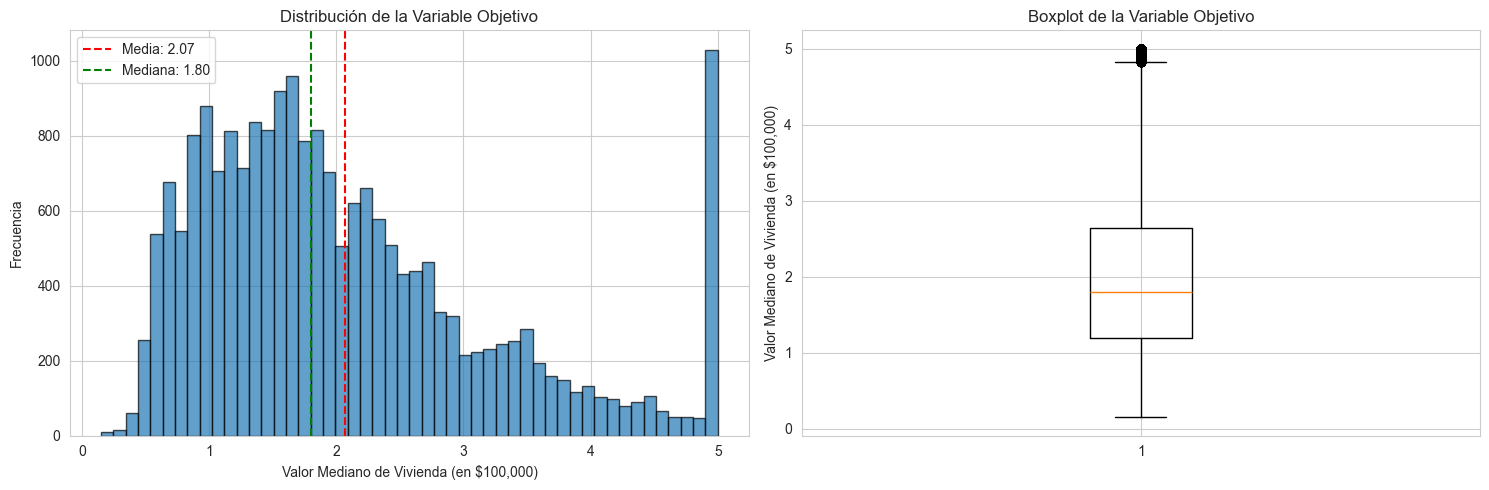


Observaciones:
- La distribución muestra una concentración de valores en el rango medio-bajo
- Existe un truncamiento en el valor máximo, lo que sugiere un límite en los datos
- La distribución presenta asimetría positiva (cola hacia la derecha)


In [35]:
# Visualización de la distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(df['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Valor Mediano de Vivienda (en $100,000)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de la Variable Objetivo')
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', label=f'Media: {df["MedHouseVal"].mean():.2f}')
axes[0].axvline(df['MedHouseVal'].median(), color='green', linestyle='--', label=f'Mediana: {df["MedHouseVal"].median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel('Valor Mediano de Vivienda (en $100,000)')
axes[1].set_title('Boxplot de la Variable Objetivo')

plt.tight_layout()
plt.show()

print("\nObservaciones:")
print("- La distribución muestra una concentración de valores en el rango medio-bajo")
print("- Existe un truncamiento en el valor máximo, lo que sugiere un límite en los datos")
print("- La distribución presenta asimetría positiva (cola hacia la derecha)")

### 2.5 Análisis de Correlaciones

Examinaremos la correlación entre las variables independientes y la variable objetivo:

In [36]:
# Matriz de correlación
print("=" * 80)
print("MATRIZ DE CORRELACIÓN")
print("=" * 80)

correlacion = df.corr()
print("\nCorrelación de variables con la variable objetivo (MedHouseVal):")
print(correlacion['MedHouseVal'].sort_values(ascending=False))

MATRIZ DE CORRELACIÓN

Correlación de variables con la variable objetivo (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


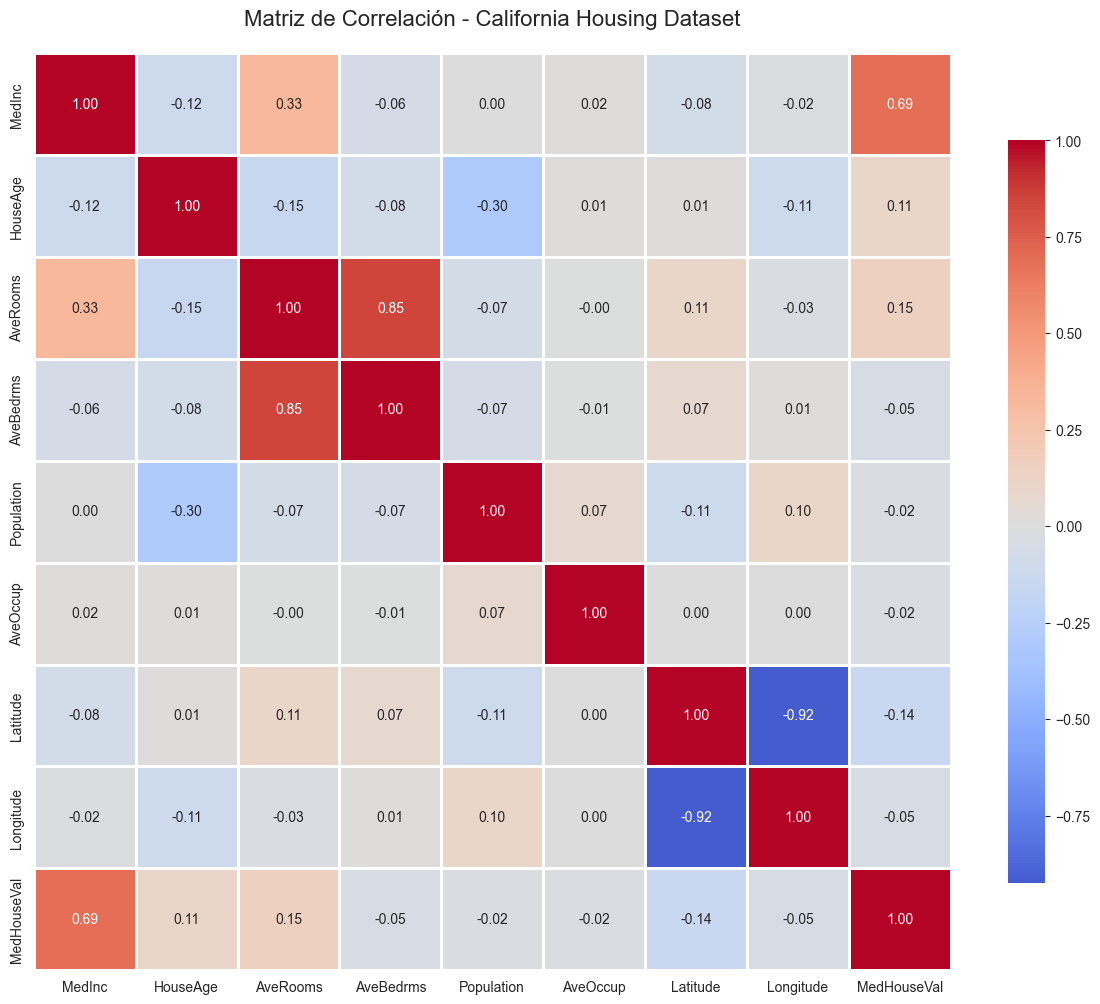


Observaciones sobre correlaciones:
- MedInc (ingreso mediano) tiene la mayor correlación positiva con el precio
- AveOccup (ocupación promedio) y Population tienen correlación débil
- Variables geográficas (Latitude, Longitude) también muestran correlación


In [37]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - California Housing Dataset', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nObservaciones sobre correlaciones:")
print("- MedInc (ingreso mediano) tiene la mayor correlación positiva con el precio")
print("- AveOccup (ocupación promedio) y Population tienen correlación débil")
print("- Variables geográficas (Latitude, Longitude) también muestran correlación")

### 2.6 Visualización de Relaciones entre Variables

Visualizaremos las relaciones entre algunas variables clave y la variable objetivo:

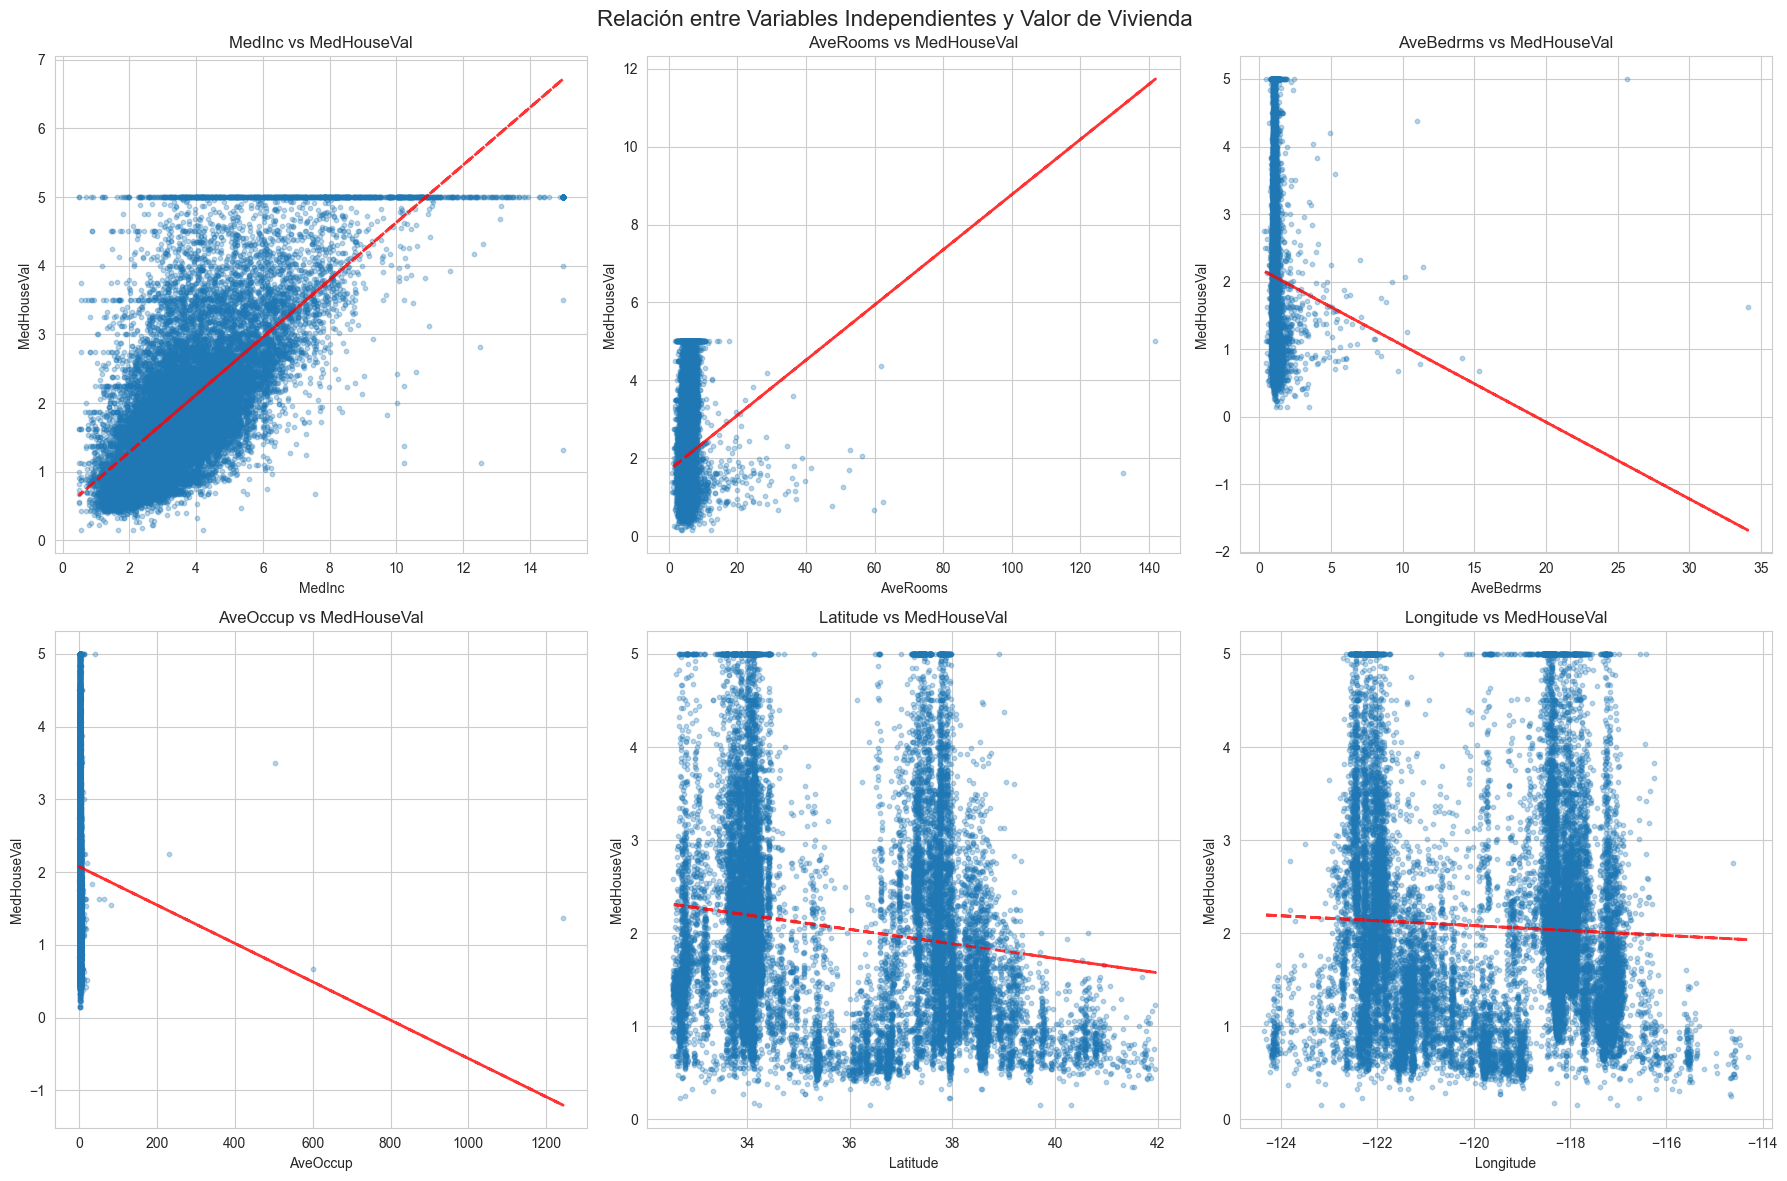


Exploración de datos completada


In [38]:
# Scatter plots de las variables más correlacionadas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Relación entre Variables Independientes y Valor de Vivienda', fontsize=16)

variables = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    axes[row, col].scatter(df[var], df['MedHouseVal'], alpha=0.3, s=10)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('MedHouseVal')
    axes[row, col].set_title(f'{var} vs MedHouseVal')
    
    # Añadir línea de tendencia
    z = np.polyfit(df[var], df['MedHouseVal'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(df[var], p(df[var]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

print("\nExploración de datos completada")

---
## 3. Preparación de Datos

### 3.1 Definición de Variables Independientes y Variable Objetivo

In [39]:
# Separar características (X) y variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print("=" * 80)
print("SEPARACIÓN DE VARIABLES")
print("=" * 80)
print(f"Variables independientes (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"\nColumnas de X: {list(X.columns)}")

SEPARACIÓN DE VARIABLES
Variables independientes (X): (20640, 8)
Variable objetivo (y): (20640,)

Columnas de X: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### 3.2 División del Dataset en Entrenamiento y Prueba

**Justificación de parámetros:**
- **test_size=0.2**: Se reserva un 20% de los datos para prueba, que es una proporción estándar que permite tener suficientes datos para entrenamiento (80%) mientras se mantiene un conjunto de prueba representativo para evaluar el modelo.
- **random_state=42**: Se fija una semilla aleatoria para garantizar la reproducibilidad de los resultados. Esto permite que cualquier persona que ejecute este notebook obtenga exactamente los mismos conjuntos de entrenamiento y prueba.

In [40]:
from sklearn.model_selection import train_test_split

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 80% entrenamiento, 20% prueba
    random_state=42     # Para reproducibilidad
)

print("=" * 80)
print("DIVISIÓN DE DATOS")
print("=" * 80)
print(f"Conjunto de entrenamiento - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Conjunto de prueba - X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nPorcentaje de entrenamiento: {len(X_train)/len(X)*100:.1f}%")
print(f"Porcentaje de prueba: {len(X_test)/len(X)*100:.1f}%")

DIVISIÓN DE DATOS
Conjunto de entrenamiento - X_train: (16512, 8), y_train: (16512,)
Conjunto de prueba - X_test: (4128, 8), y_test: (4128,)

Porcentaje de entrenamiento: 80.0%
Porcentaje de prueba: 20.0%


---
## 4. Entrenamiento Inicial de Modelos

Entrenaremos tres modelos diferentes con sus hiperparámetros por defecto y evaluaremos su rendimiento inicial.

### 4.1 Importar Modelos y Métricas

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Modelos y métricas importados correctamente")

Modelos y métricas importados correctamente


### 4.2 Modelo 1: Regresión Lineal

**LinearRegression**: Modelo que establece una relación lineal entre las variables independientes y la variable objetivo. Busca encontrar los coeficientes que minimizan el error cuadrático.

**Parámetros por defecto:**
- `fit_intercept=True`: Calcula el término independiente (intercepto)
- `copy_X=True`: Copia los datos de entrada
- `n_jobs=None`: No usa paralelización

In [42]:
print("=" * 80)
print("MODELO 1: REGRESIÓN LINEAL")
print("=" * 80)

# Crear el modelo
lr_model = LinearRegression()

# Entrenar el modelo
lr_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\nResultados - Regresión Lineal (parámetros por defecto):")
print(f"MAE (Mean Absolute Error): {mae_lr:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_lr:.4f}")
print(f"R² (Coeficiente de Determinación): {r2_lr:.4f}")
print("\nModelo entrenado exitosamente")

MODELO 1: REGRESIÓN LINEAL

Resultados - Regresión Lineal (parámetros por defecto):
MAE (Mean Absolute Error): 0.5332
RMSE (Root Mean Squared Error): 0.7456
R² (Coeficiente de Determinación): 0.5758

Modelo entrenado exitosamente


### 4.3 Modelo 2: Árbol de Decisión para Regresión

**DecisionTreeRegressor**: Modelo que crea un árbol de decisiones donde cada nodo representa una condición sobre una característica, dividiendo los datos recursivamente para hacer predicciones.

**Parámetros por defecto:**
- `criterion='squared_error'`: Función para medir calidad de divisiones
- `max_depth=None`: Sin límite de profundidad (puede sobreajustar)
- `min_samples_split=2`: Mínimo de muestras para dividir un nodo
- `min_samples_leaf=1`: Mínimo de muestras en nodo hoja
- `random_state=None`: Sin semilla aleatoria

In [43]:
print("=" * 80)
print("MODELO 2: ÁRBOL DE DECISIÓN")
print("=" * 80)

# Crear el modelo con random_state para reproducibilidad
dt_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = dt_model.predict(X_test)

# Calcular métricas
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\nResultados - Árbol de Decisión (parámetros por defecto):")
print(f"MAE (Mean Absolute Error): {mae_dt:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_dt:.4f}")
print(f"R² (Coeficiente de Determinación): {r2_dt:.4f}")
print(f"\nProfundidad del árbol: {dt_model.get_depth()}")
print(f"Número de hojas: {dt_model.get_n_leaves()}")
print("\nModelo entrenado exitosamente")

MODELO 2: ÁRBOL DE DECISIÓN

Resultados - Árbol de Decisión (parámetros por defecto):
MAE (Mean Absolute Error): 0.4558
RMSE (Root Mean Squared Error): 0.7069
R² (Coeficiente de Determinación): 0.6187

Profundidad del árbol: 34
Número de hojas: 15861

Modelo entrenado exitosamente


### 4.4 Modelo 3: Random Forest para Regresión

**RandomForestRegressor**: Modelo ensemble que combina múltiples árboles de decisión entrenados con diferentes muestras de datos, reduciendo el sobreajuste y mejorando la generalización.

**Parámetros por defecto:**
- `n_estimators=100`: Número de árboles en el bosque
- `criterion='squared_error'`: Función para medir calidad de divisiones
- `max_depth=None`: Sin límite de profundidad
- `min_samples_split=2`: Mínimo de muestras para dividir un nodo
- `min_samples_leaf=1`: Mínimo de muestras en nodo hoja
- `max_features=1.0`: Usa todas las características
- `random_state=None`: Sin semilla aleatoria

In [44]:
print("=" * 80)
print("MODELO 3: RANDOM FOREST")
print("=" * 80)

# Crear el modelo con random_state para reproducibilidad
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nResultados - Random Forest (parámetros por defecto):")
print(f"MAE (Mean Absolute Error): {mae_rf:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_rf:.4f}")
print(f"R² (Coeficiente de Determinación): {r2_rf:.4f}")
print("\n Modelo entrenado exitosamente")

MODELO 3: RANDOM FOREST

Resultados - Random Forest (parámetros por defecto):
MAE (Mean Absolute Error): 0.3276
RMSE (Root Mean Squared Error): 0.5057
R² (Coeficiente de Determinación): 0.8049

 Modelo entrenado exitosamente


### 4.5 Comparación de Modelos Iniciales

In [45]:
# Crear DataFrame con resultados
resultados_iniciales = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R²': [r2_lr, r2_dt, r2_rf]
})

print("=" * 80)
print("COMPARACIÓN DE MODELOS - ENTRENAMIENTO INICIAL")
print("=" * 80)
print(resultados_iniciales.to_string(index=False))

# Identificar el mejor modelo
mejor_r2 = resultados_iniciales.loc[resultados_iniciales['R²'].idxmax(), 'Modelo']
mejor_mae = resultados_iniciales.loc[resultados_iniciales['MAE'].idxmin(), 'Modelo']
mejor_rmse = resultados_iniciales.loc[resultados_iniciales['RMSE'].idxmin(), 'Modelo']

print(f"\nMejor modelo según R²: {mejor_r2}")
print(f"Mejor modelo según MAE: {mejor_mae}")
print(f"Mejor modelo según RMSE: {mejor_rmse}")

COMPARACIÓN DE MODELOS - ENTRENAMIENTO INICIAL
           Modelo      MAE     RMSE       R²
 Regresión Lineal 0.533200 0.745581 0.575788
Árbol de Decisión 0.455762 0.706900 0.618663
    Random Forest 0.327599 0.505694 0.804850

Mejor modelo según R²: Random Forest
Mejor modelo según MAE: Random Forest
Mejor modelo según RMSE: Random Forest


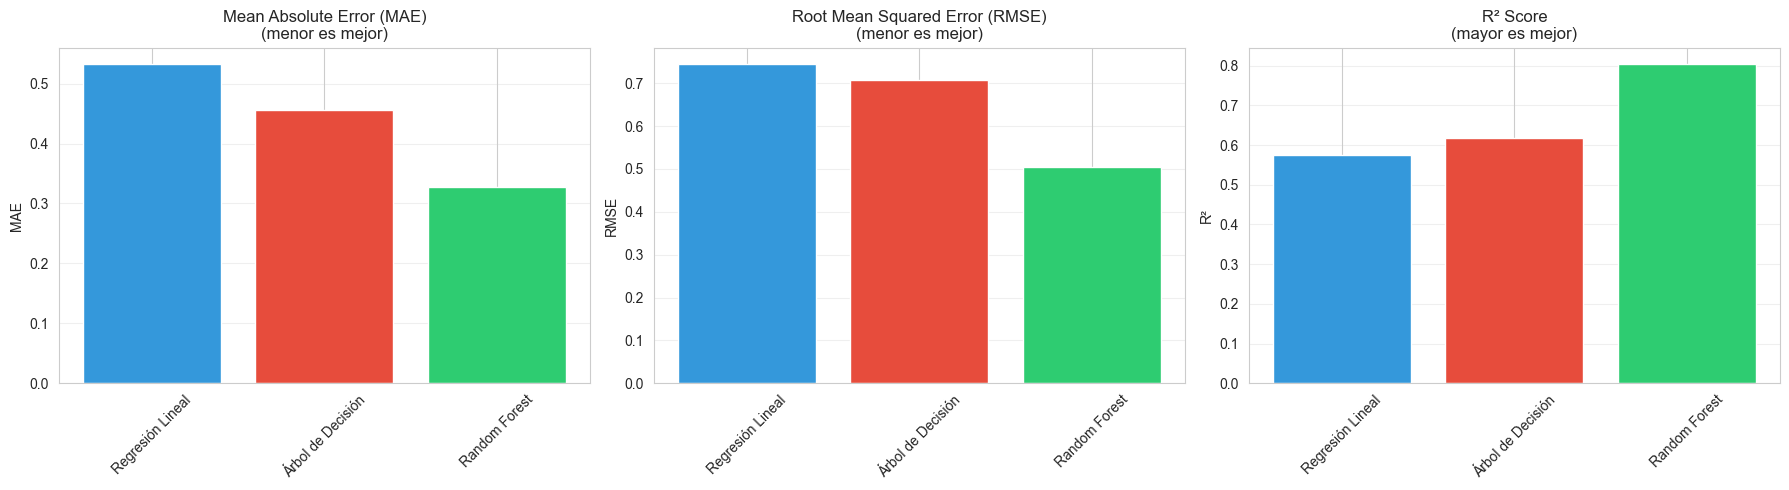


Observaciones iniciales:
- Los modelos basados en árboles muestran mejor desempeño que la regresión lineal
- Random Forest aprovecha el ensemble para mejorar las predicciones
- Procederemos a optimizar los hiperparámetros para mejorar el rendimiento


In [46]:
# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
axes[0].bar(resultados_iniciales['Modelo'], resultados_iniciales['MAE'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_ylabel('MAE')
axes[0].set_title('Mean Absolute Error (MAE)\n(menor es mejor)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# RMSE
axes[1].bar(resultados_iniciales['Modelo'], resultados_iniciales['RMSE'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1].set_ylabel('RMSE')
axes[1].set_title('Root Mean Squared Error (RMSE)\n(menor es mejor)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# R²
axes[2].bar(resultados_iniciales['Modelo'], resultados_iniciales['R²'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[2].set_ylabel('R²')
axes[2].set_title('R² Score\n(mayor es mejor)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservaciones iniciales:")
print("- Los modelos basados en árboles muestran mejor desempeño que la regresión lineal")
print("- Random Forest aprovecha el ensemble para mejorar las predicciones")
print("- Procederemos a optimizar los hiperparámetros para mejorar el rendimiento")

---
## 5. Optimización de Hiperparámetros

Utilizaremos **GridSearchCV** y **RandomizedSearchCV** para encontrar los mejores hiperparámetros para nuestros modelos.

### 5.1 Información sobre GridSearchCV y RandomizedSearchCV

**GridSearchCV:**
- Realiza una búsqueda exhaustiva sobre un grid de parámetros especificado
- Prueba todas las combinaciones posibles de hiperparámetros
- Es más costoso computacionalmente pero garantiza encontrar la mejor combinación dentro del grid
- Útil cuando el espacio de búsqueda es pequeño

**Parámetros principales:**
- `estimator`: El modelo a optimizar
- `param_grid`: Diccionario con los parámetros a probar
- `cv`: Número de folds para validación cruzada (k-fold cross-validation)
- `scoring`: Métrica a optimizar
- `n_jobs`: Número de trabajos en paralelo (-1 usa todos los cores)
- `verbose`: Nivel de mensajes de progreso

**Retorna:**
- `best_params_`: Mejores hiperparámetros encontrados
- `best_score_`: Mejor score obtenido
- `best_estimator_`: Modelo entrenado con los mejores parámetros
- `cv_results_`: Diccionario con todos los resultados

---

**RandomizedSearchCV:**
- Realiza una búsqueda aleatoria sobre distribuciones de parámetros
- No prueba todas las combinaciones, sino un número especificado de muestras aleatorias
- Más eficiente computacionalmente para espacios de búsqueda grandes
- Puede explorar un rango más amplio de valores

**Parámetros principales:**
- `estimator`: El modelo a optimizar
- `param_distributions`: Diccionario con distribuciones de parámetros
- `n_iter`: Número de combinaciones aleatorias a probar
- `cv`: Número de folds para validación cruzada
- `scoring`: Métrica a optimizar
- `n_jobs`: Número de trabajos en paralelo
- `random_state`: Semilla para reproducibilidad

**Retorna:** Los mismos atributos que GridSearchCV

---

**Justificación de la elección:**
- Usaremos **GridSearchCV** para el Árbol de Decisión porque tiene pocos parámetros a ajustar
- Usaremos **RandomizedSearchCV** para Random Forest porque tiene más hiperparámetros y rangos más amplios

**Validación cruzada:**
- Utilizaremos **5-fold cross-validation** (cv=5), que es un valor estándar que balancea entre sesgo y varianza
- Divide los datos de entrenamiento en 5 partes: entrena con 4 y valida con 1, rotando 5 veces
- Proporciona una estimación robusta del rendimiento del modelo

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("Módulos de búsqueda de hiperparámetros importados")

Módulos de búsqueda de hiperparámetros importados


### 5.2 Optimización del Árbol de Decisión (GridSearchCV)

Ajustaremos los siguientes hiperparámetros:
- **max_depth**: Profundidad máxima del árbol (controla el sobreajuste)
- **min_samples_split**: Número mínimo de muestras para dividir un nodo
- **min_samples_leaf**: Número mínimo de muestras en una hoja
- **max_features**: Número de características a considerar para la mejor división

In [48]:
print("=" * 80)
print("OPTIMIZACIÓN - ÁRBOL DE DECISIÓN (GridSearchCV)")
print("=" * 80)

# Definir el grid de parámetros a explorar
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

print("\nGrid de parámetros:")
for param, values in param_grid_dt.items():
    print(f"  {param}: {values}")

print(f"\nTotal de combinaciones a probar: {np.prod([len(v) for v in param_grid_dt.values()])}")

# Crear el modelo base
dt_base = DecisionTreeRegressor(random_state=42)

# Configurar GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid_dt,
    cv=5,                    # 5-fold cross-validation
    scoring='r2',            # Métrica a optimizar
    n_jobs=-1,               # Usar todos los cores disponibles
    verbose=1,               # Mostrar progreso
    return_train_score=True
)

print("\nIniciando búsqueda de hiperparámetros...")
print("Esto puede tardar varios minutos...\n")

# Realizar la búsqueda
grid_search_dt.fit(X_train, y_train)

print("\n Búsqueda completada!")
print(f"\n Mejores hiperparámetros encontrados:")
for param, value in grid_search_dt.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor score (R²) en validación cruzada: {grid_search_dt.best_score_:.4f}")

OPTIMIZACIÓN - ÁRBOL DE DECISIÓN (GridSearchCV)

Grid de parámetros:
  max_depth: [5, 10, 15, 20, None]
  min_samples_split: [2, 5, 10, 20]
  min_samples_leaf: [1, 2, 4, 8]
  max_features: ['sqrt', 'log2', None]

Total de combinaciones a probar: 240

Iniciando búsqueda de hiperparámetros...
Esto puede tardar varios minutos...

Fitting 5 folds for each of 240 candidates, totalling 1200 fits

 Búsqueda completada!

 Mejores hiperparámetros encontrados:
  max_depth: 15
  max_features: None
  min_samples_leaf: 8
  min_samples_split: 20

Mejor score (R²) en validación cruzada: 0.7201


In [49]:
# Entrenar el modelo con los mejores parámetros y evaluar
best_dt_model = grid_search_dt.best_estimator_

# Predicciones con el modelo optimizado
y_pred_dt_optimized = best_dt_model.predict(X_test)

# Calcular métricas
mae_dt_opt = mean_absolute_error(y_test, y_pred_dt_optimized)
rmse_dt_opt = np.sqrt(mean_squared_error(y_test, y_pred_dt_optimized))
r2_dt_opt = r2_score(y_test, y_pred_dt_optimized)

print("=" * 80)
print("RESULTADOS - ÁRBOL DE DECISIÓN OPTIMIZADO")
print("=" * 80)
print(f"MAE: {mae_dt_opt:.4f} (antes: {mae_dt:.4f}) - Mejora: {((mae_dt - mae_dt_opt)/mae_dt*100):.2f}%")
print(f"RMSE: {rmse_dt_opt:.4f} (antes: {rmse_dt:.4f}) - Mejora: {((rmse_dt - rmse_dt_opt)/rmse_dt*100):.2f}%")
print(f"R²: {r2_dt_opt:.4f} (antes: {r2_dt:.4f}) - Mejora: {((r2_dt_opt - r2_dt)/r2_dt*100):.2f}%")
print(f"\nProfundidad del árbol optimizado: {best_dt_model.get_depth()}")
print(f"Número de hojas: {best_dt_model.get_n_leaves()}")

RESULTADOS - ÁRBOL DE DECISIÓN OPTIMIZADO
MAE: 0.4052 (antes: 0.4558) - Mejora: 11.10%
RMSE: 0.6058 (antes: 0.7069) - Mejora: 14.31%
R²: 0.7200 (antes: 0.6187) - Mejora: 16.38%

Profundidad del árbol optimizado: 15
Número de hojas: 1239


### 5.3 Optimización de Random Forest (RandomizedSearchCV)

Ajustaremos los siguientes hiperparámetros:
- **n_estimators**: Número de árboles en el bosque
- **max_depth**: Profundidad máxima de cada árbol
- **min_samples_split**: Número mínimo de muestras para dividir un nodo
- **min_samples_leaf**: Número mínimo de muestras en una hoja
- **max_features**: Número de características a considerar por split
- **bootstrap**: Si usar bootstrap para muestras

In [50]:
print("=" * 80)
print("OPTIMIZACIÓN - RANDOM FOREST (RandomizedSearchCV)")
print("=" * 80)

# Definir distribuciones de parámetros a explorar
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

print("\nDistribuciones de parámetros:")
for param, values in param_distributions_rf.items():
    print(f"  {param}: {values}")

# Número de iteraciones (combinaciones aleatorias a probar)
n_iter = 100

print(f"\nNúmero de combinaciones a probar: {n_iter}")
print(f"Total de combinaciones posibles: {np.prod([len(v) for v in param_distributions_rf.values()])}")

# Crear el modelo base
rf_base = RandomForestRegressor(random_state=42)

# Configurar RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions_rf,
    n_iter=n_iter,           # Número de combinaciones a probar
    cv=5,                    # 5-fold cross-validation
    scoring='r2',            # Métrica a optimizar
    n_jobs=-1,               # Usar todos los cores disponibles
    verbose=1,               # Mostrar progreso
    random_state=42,         # Para reproducibilidad
    return_train_score=True
)

print("\nIniciando búsqueda aleatoria de hiperparámetros...")
print("Esto puede tardar varios minutos...\n")

# Realizar la búsqueda
random_search_rf.fit(X_train, y_train)

print("\n Búsqueda completada!")
print(f"\n Mejores hiperparámetros encontrados:")
for param, value in random_search_rf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor score (R²) en validación cruzada: {random_search_rf.best_score_:.4f}")

OPTIMIZACIÓN - RANDOM FOREST (RandomizedSearchCV)

Distribuciones de parámetros:
  n_estimators: [50, 100, 200, 300, 400]
  max_depth: [5, 10, 15, 20, 25, None]
  min_samples_split: [2, 5, 10, 15]
  min_samples_leaf: [1, 2, 4, 6]
  max_features: ['sqrt', 'log2', None]
  bootstrap: [True, False]

Número de combinaciones a probar: 100
Total de combinaciones posibles: 2880

Iniciando búsqueda aleatoria de hiperparámetros...
Esto puede tardar varios minutos...

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Búsqueda completada!

 Mejores hiperparámetros encontrados:
  n_estimators: 400
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: log2
  max_depth: None
  bootstrap: False

Mejor score (R²) en validación cruzada: 0.8235


In [51]:
# Entrenar el modelo con los mejores parámetros y evaluar
best_rf_model = random_search_rf.best_estimator_

# Predicciones con el modelo optimizado
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Calcular métricas
mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_optimized)
rmse_rf_opt = np.sqrt(mean_squared_error(y_test, y_pred_rf_optimized))
r2_rf_opt = r2_score(y_test, y_pred_rf_optimized)

print("=" * 80)
print("RESULTADOS - RANDOM FOREST OPTIMIZADO")
print("=" * 80)
print(f"MAE: {mae_rf_opt:.4f} (antes: {mae_rf:.4f}) - Mejora: {((mae_rf - mae_rf_opt)/mae_rf*100):.2f}%")
print(f"RMSE: {rmse_rf_opt:.4f} (antes: {rmse_rf:.4f}) - Mejora: {((rmse_rf - rmse_rf_opt)/rmse_rf*100):.2f}%")
print(f"R²: {r2_rf_opt:.4f} (antes: {r2_rf:.4f}) - Mejora: {((r2_rf_opt - r2_rf)/r2_rf*100):.2f}%")

RESULTADOS - RANDOM FOREST OPTIMIZADO
MAE: 0.3106 (antes: 0.3276) - Mejora: 5.20%
RMSE: 0.4807 (antes: 0.5057) - Mejora: 4.94%
R²: 0.8237 (antes: 0.8049) - Mejora: 2.34%


---
## 6. Evaluación del Rendimiento

### 6.1 Justificación de Métricas

Utilizamos tres métricas principales para evaluar los modelos de regresión:

**1. MAE (Mean Absolute Error - Error Absoluto Medio):**
- Promedio de los valores absolutos de los errores
- Métrica robusta a valores atípicos
- Fácil de interpretar: error promedio en las mismas unidades que la variable objetivo
- Fórmula: $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

**2. RMSE (Root Mean Squared Error - Raíz del Error Cuadrático Medio):**
- Raíz cuadrada del promedio de los errores al cuadrado
- Penaliza más los errores grandes que MAE
- Mismas unidades que la variable objetivo
- Fórmula: $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

**3. R² (Coeficiente de Determinación):**
- Proporción de la varianza en la variable objetivo explicada por el modelo
- Rango de 0 a 1 (aunque puede ser negativo si el modelo es muy malo)
- 1 = modelo perfecto, 0 = modelo no explica nada
- Independiente de la escala
- Fórmula: $R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

**Justificación de uso:**
- **MAE** nos da una idea del error típico en términos de precio de vivienda
- **RMSE** nos indica si el modelo tiene errores muy grandes ocasionales
- **R²** nos dice qué tan bien el modelo explica la variabilidad en los precios

### 6.2 Comparación Final de Todos los Modelos

In [52]:
# Crear DataFrame con todos los resultados
resultados_finales = pd.DataFrame({
    'Modelo': [
        'Regresión Lineal',
        'Árbol de Decisión (inicial)',
        'Árbol de Decisión (optimizado)',
        'Random Forest (inicial)',
        'Random Forest (optimizado)'
    ],
    'MAE': [mae_lr, mae_dt, mae_dt_opt, mae_rf, mae_rf_opt],
    'RMSE': [rmse_lr, rmse_dt, rmse_dt_opt, rmse_rf, rmse_rf_opt],
    'R²': [r2_lr, r2_dt, r2_dt_opt, r2_rf, r2_rf_opt]
})

print("=" * 100)
print("COMPARACIÓN FINAL DE MODELOS")
print("=" * 100)
print(resultados_finales.to_string(index=False))

# Identificar el mejor modelo final
mejor_modelo_idx = resultados_finales['R²'].idxmax()
mejor_modelo = resultados_finales.loc[mejor_modelo_idx, 'Modelo']
mejor_mae = resultados_finales.loc[mejor_modelo_idx, 'MAE']
mejor_rmse = resultados_finales.loc[mejor_modelo_idx, 'RMSE']
mejor_r2 = resultados_finales.loc[mejor_modelo_idx, 'R²']

print(f"\n MEJOR MODELO: {mejor_modelo}")
print(f"   MAE: {mejor_mae:.4f}")
print(f"   RMSE: {mejor_rmse:.4f}")
print(f"   R²: {mejor_r2:.4f}")

COMPARACIÓN FINAL DE MODELOS
                        Modelo      MAE     RMSE       R²
              Regresión Lineal 0.533200 0.745581 0.575788
   Árbol de Decisión (inicial) 0.455762 0.706900 0.618663
Árbol de Decisión (optimizado) 0.405179 0.605761 0.719975
       Random Forest (inicial) 0.327599 0.505694 0.804850
    Random Forest (optimizado) 0.310569 0.480704 0.823661

 MEJOR MODELO: Random Forest (optimizado)
   MAE: 0.3106
   RMSE: 0.4807
   R²: 0.8237


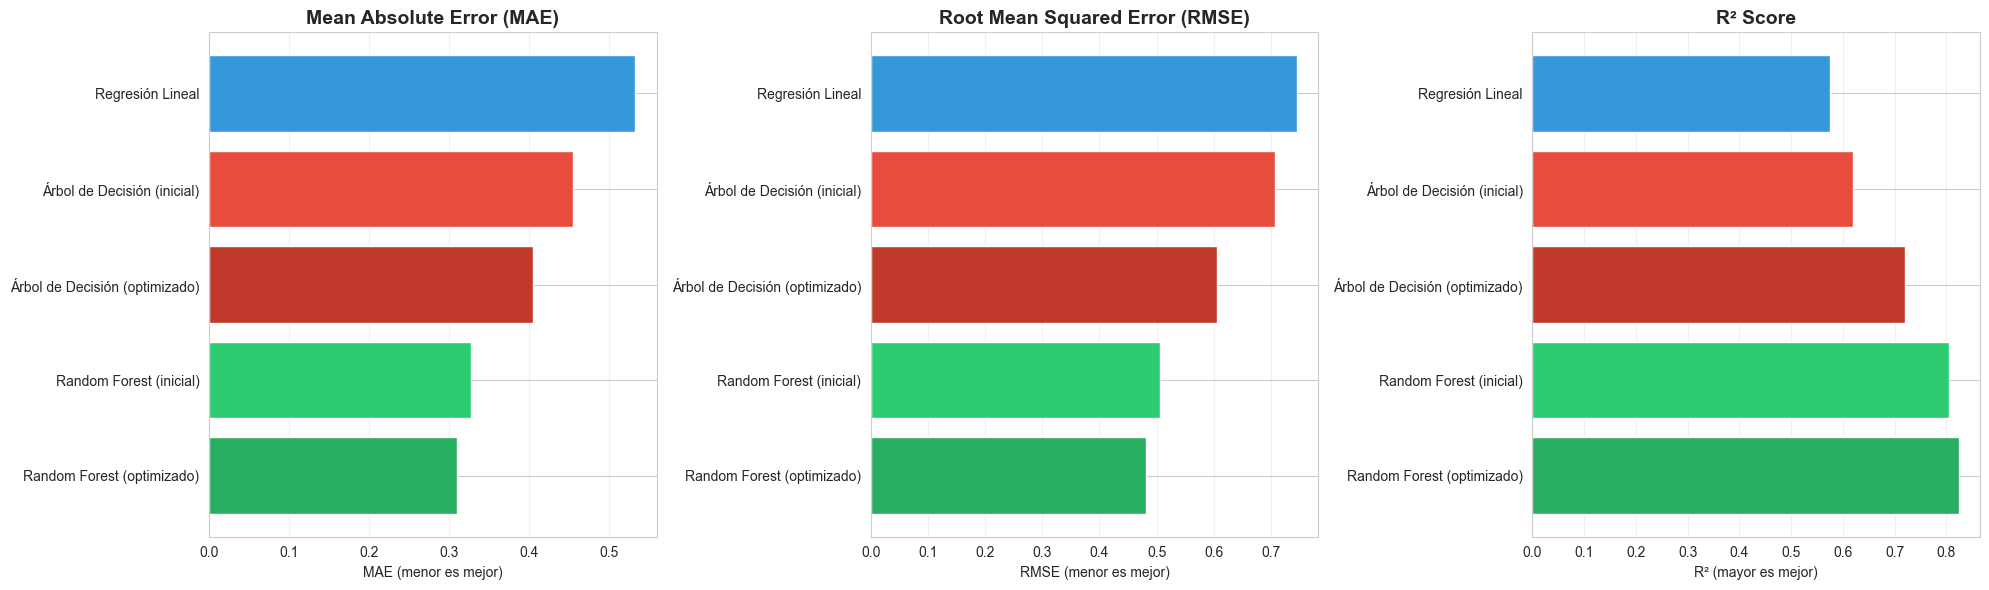

In [53]:
# Visualización comparativa final
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

modelos = resultados_finales['Modelo']
colores = ['#3498db', '#e74c3c', '#c0392b', '#2ecc71', '#27ae60']

# MAE
axes[0].barh(modelos, resultados_finales['MAE'], color=colores)
axes[0].set_xlabel('MAE (menor es mejor)')
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# RMSE
axes[1].barh(modelos, resultados_finales['RMSE'], color=colores)
axes[1].set_xlabel('RMSE (menor es mejor)')
axes[1].set_title('Root Mean Squared Error (RMSE)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# R²
axes[2].barh(modelos, resultados_finales['R²'], color=colores)
axes[2].set_xlabel('R² (mayor es mejor)')
axes[2].set_title('R² Score', fontsize=14, fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Análisis Visual de Predicciones del Mejor Modelo

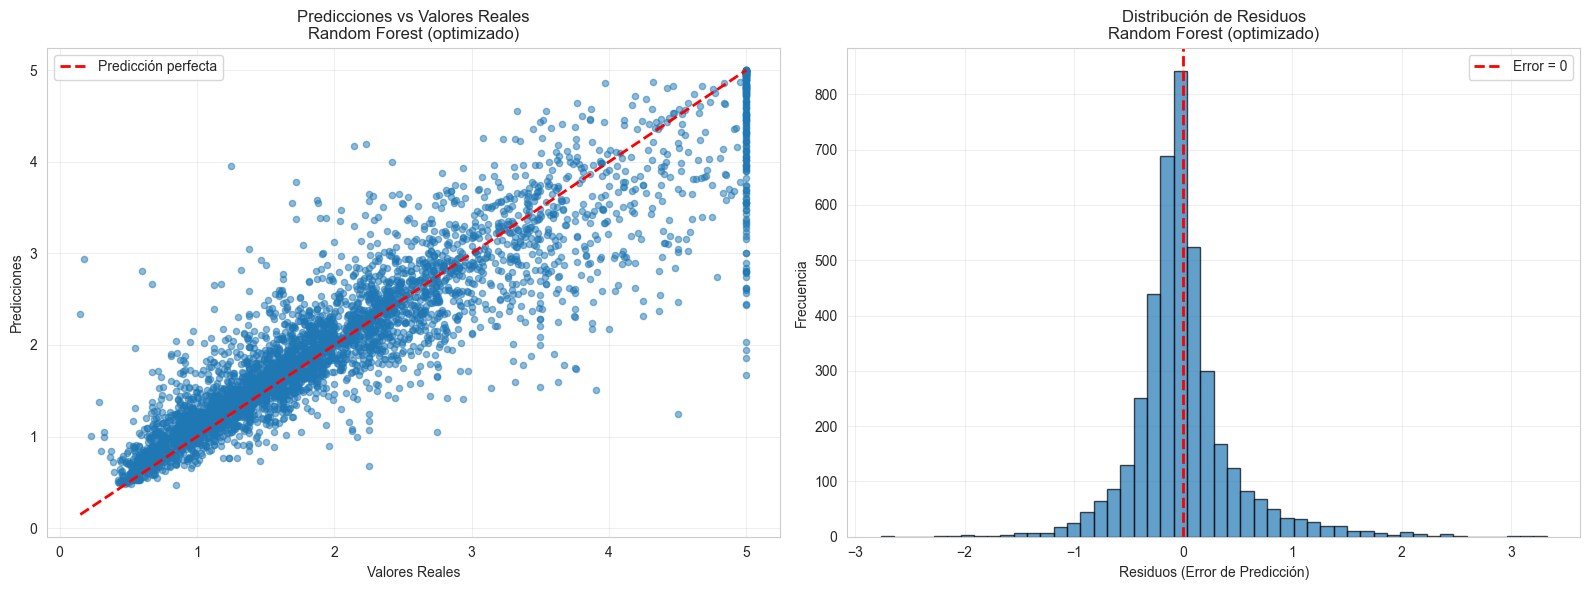


 Análisis de residuos:
Media de residuos: -0.0032 (debe estar cerca de 0)
Desviación estándar de residuos: 0.4808
Mediana de residuos: -0.0470


In [54]:
# Determinar cuál es el mejor modelo
if mejor_modelo == 'Random Forest (optimizado)':
    modelo_final = best_rf_model
    y_pred_final = y_pred_rf_optimized
elif mejor_modelo == 'Árbol de Decisión (optimizado)':
    modelo_final = best_dt_model
    y_pred_final = y_pred_dt_optimized
else:
    modelo_final = lr_model
    y_pred_final = y_pred_lr

# Visualización de predicciones vs valores reales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Predicciones vs Valores Reales
axes[0].scatter(y_test, y_pred_final, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title(f'Predicciones vs Valores Reales\n{mejor_modelo}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma de residuos
residuos = y_test - y_pred_final
axes[1].hist(residuos, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[1].set_xlabel('Residuos (Error de Predicción)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title(f'Distribución de Residuos\n{mejor_modelo}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Análisis de residuos:")
print(f"Media de residuos: {residuos.mean():.4f} (debe estar cerca de 0)")
print(f"Desviación estándar de residuos: {residuos.std():.4f}")
print(f"Mediana de residuos: {residuos.median():.4f}")

---
## 7. Análisis e Interpretación del Modelo Óptimo

En esta sección analizaremos en detalle el modelo que obtuvo el mejor rendimiento.

In [55]:
print("=" * 100)
print(f"ANÁLISIS DEL MODELO ÓPTIMO: {mejor_modelo}")
print("=" * 100)

ANÁLISIS DEL MODELO ÓPTIMO: Random Forest (optimizado)


### 7.1 Análisis de Hiperparámetros Finales

In [56]:
if mejor_modelo == 'Regresión Lineal':
    print("\n ANÁLISIS DE REGRESIÓN LINEAL")
    print("-" * 80)
    print("\nLa regresión lineal no tiene hiperparámetros complejos a ajustar.")
    print("Este modelo asume una relación lineal entre las características y el precio.")
    print("\n El modelo es simple, interpretable y sirve como baseline.")
    
elif 'Árbol de Decisión' in mejor_modelo:
    print("\n ANÁLISIS DE HIPERPARÁMETROS - ÁRBOL DE DECISIÓN OPTIMIZADO")
    print("-" * 80)
    print(f"\nHiperparámetros finales:")
    for param, value in grid_search_dt.best_params_.items():
        print(f"  • {param}: {value}")
    
    print("\n Interpretación de los hiperparámetros:")
    
    max_depth = grid_search_dt.best_params_['max_depth']
    if max_depth is None:
        print(f"  • max_depth = None: El árbol puede crecer sin restricciones de profundidad.")
        print("    → Mayor capacidad de capturar patrones complejos, pero riesgo de sobreajuste.")
    else:
        print(f"  • max_depth = {max_depth}: Limita la profundidad del árbol.")
        print(f"    → Controla la complejidad del modelo, previene sobreajuste.")
    
    min_samples_split = grid_search_dt.best_params_['min_samples_split']
    print(f"\n  • min_samples_split = {min_samples_split}: Número mínimo de muestras para dividir un nodo.")
    print(f"    → Valores altos ({min_samples_split}) previenen divisiones con pocas muestras.")
    print(f"    → Mayor generalización, menos sensible a ruido.")
    
    min_samples_leaf = grid_search_dt.best_params_['min_samples_leaf']
    print(f"\n  • min_samples_leaf = {min_samples_leaf}: Número mínimo de muestras en nodo hoja.")
    print(f"    → Asegura que cada predicción se base en al menos {min_samples_leaf} observaciones.")
    print(f"    → Reduce varianza y mejora estabilidad del modelo.")
    
    max_features = grid_search_dt.best_params_['max_features']
    print(f"\n  • max_features = {max_features}: Características a considerar por división.")
    if max_features == 'sqrt':
        print("    → Usa raíz cuadrada del total de características.")
    elif max_features == 'log2':
        print("    → Usa log₂ del total de características.")
    else:
        print("    → Usa todas las características disponibles.")
    print("    → Introduce aleatoriedad y reduce correlación entre divisiones.")
    
    print(f"\n Información estructural del árbol:")
    print(f"  • Profundidad real: {best_dt_model.get_depth()}")
    print(f"  • Número de hojas: {best_dt_model.get_n_leaves()}")
    print(f"  • Número de nodos: {best_dt_model.tree_.node_count}")
    
elif 'Random Forest' in mejor_modelo:
    print("\n ANÁLISIS DE HIPERPARÁMETROS - RANDOM FOREST OPTIMIZADO")
    print("-" * 80)
    print(f"\nHiperparámetros finales:")
    for param, value in random_search_rf.best_params_.items():
        print(f"  • {param}: {value}")
    
    print("\n Interpretación de los hiperparámetros:")
    
    n_estimators = random_search_rf.best_params_['n_estimators']
    print(f"  • n_estimators = {n_estimators}: Número de árboles en el bosque.")
    print(f"    → Más árboles ({n_estimators}) → Mayor estabilidad y mejor rendimiento.")
    print(f"    → Pero también mayor costo computacional.")
    
    max_depth = random_search_rf.best_params_['max_depth']
    if max_depth is None:
        print(f"\n  • max_depth = None: Cada árbol puede crecer sin restricciones.")
        print("    → Mayor capacidad de capturar relaciones complejas.")
    else:
        print(f"\n  • max_depth = {max_depth}: Limita profundidad de cada árbol.")
        print(f"    → Controla complejidad individual de los árboles.")
    
    min_samples_split = random_search_rf.best_params_['min_samples_split']
    print(f"\n  • min_samples_split = {min_samples_split}: Mínimo de muestras para dividir.")
    print(f"    → Previene que árboles individuales se sobre-especialicen.")
    
    min_samples_leaf = random_search_rf.best_params_['min_samples_leaf']
    print(f"\n  • min_samples_leaf = {min_samples_leaf}: Mínimo de muestras en hojas.")
    print(f"    → Asegura predicciones basadas en suficientes observaciones.")
    
    max_features = random_search_rf.best_params_['max_features']
    print(f"\n  • max_features = {max_features}: Características por división.")
    if max_features == 'sqrt':
        n_features_per_split = int(np.sqrt(X_train.shape[1]))
        print(f"    → Usa √{X_train.shape[1]} = {n_features_per_split} características por split.")
    elif max_features == 'log2':
        n_features_per_split = int(np.log2(X_train.shape[1]))
        print(f"    → Usa log₂({X_train.shape[1]}) = {n_features_per_split} características por split.")
    else:
        print(f"    → Usa todas las {X_train.shape[1]} características.")
    print("    → Reduce correlación entre árboles → Mayor diversidad en el ensemble.")
    
    bootstrap = random_search_rf.best_params_['bootstrap']
    print(f"\n  • bootstrap = {bootstrap}: {'Usa' if bootstrap else 'No usa'} bootstrap para muestras.")
    if bootstrap:
        print("    → Cada árbol se entrena con una muestra aleatoria con reemplazo.")
        print("    → Aumenta diversidad entre árboles del bosque.")
    else:
        print("    → Cada árbol usa todo el conjunto de entrenamiento.")
        print("    → Menos diversidad, pero puede ser útil con datasets pequeños.")
    
    print(f"\n Efecto ensemble:")
    print(f"  • El Random Forest combina {n_estimators} árboles distintos")
    print(f"  • Cada árbol ve diferentes muestras y características")
    print(f"  • La predicción final es el promedio de todos los árboles")
    print(f"  • Esto reduce varianza y mejora generalización vs árbol único")


 ANÁLISIS DE HIPERPARÁMETROS - RANDOM FOREST OPTIMIZADO
--------------------------------------------------------------------------------

Hiperparámetros finales:
  • n_estimators: 400
  • min_samples_split: 5
  • min_samples_leaf: 2
  • max_features: log2
  • max_depth: None
  • bootstrap: False

 Interpretación de los hiperparámetros:
  • n_estimators = 400: Número de árboles en el bosque.
    → Más árboles (400) → Mayor estabilidad y mejor rendimiento.
    → Pero también mayor costo computacional.

  • max_depth = None: Cada árbol puede crecer sin restricciones.
    → Mayor capacidad de capturar relaciones complejas.

  • min_samples_split = 5: Mínimo de muestras para dividir.
    → Previene que árboles individuales se sobre-especialicen.

  • min_samples_leaf = 2: Mínimo de muestras en hojas.
    → Asegura predicciones basadas en suficientes observaciones.

  • max_features = log2: Características por división.
    → Usa log₂(8) = 3 características por split.
    → Reduce correlac

### 7.2 Interpretación de la Relación entre Variables


 IMPORTANCIA DE VARIABLES (FEATURE IMPORTANCE)
--------------------------------------------------------------------------------

Importancia de cada variable:
  Variable  Importancia
    MedInc     0.408284
  Latitude     0.130677
 Longitude     0.127303
  AveOccup     0.124200
  AveRooms     0.101443
  HouseAge     0.050303
 AveBedrms     0.033306
Population     0.024484

 Interpretación de importancia:
  • Mide cuánto contribuye cada variable a reducir el error
  • Valores altos → Variable más útil para hacer predicciones
  • Suma total de importancias = 1.0


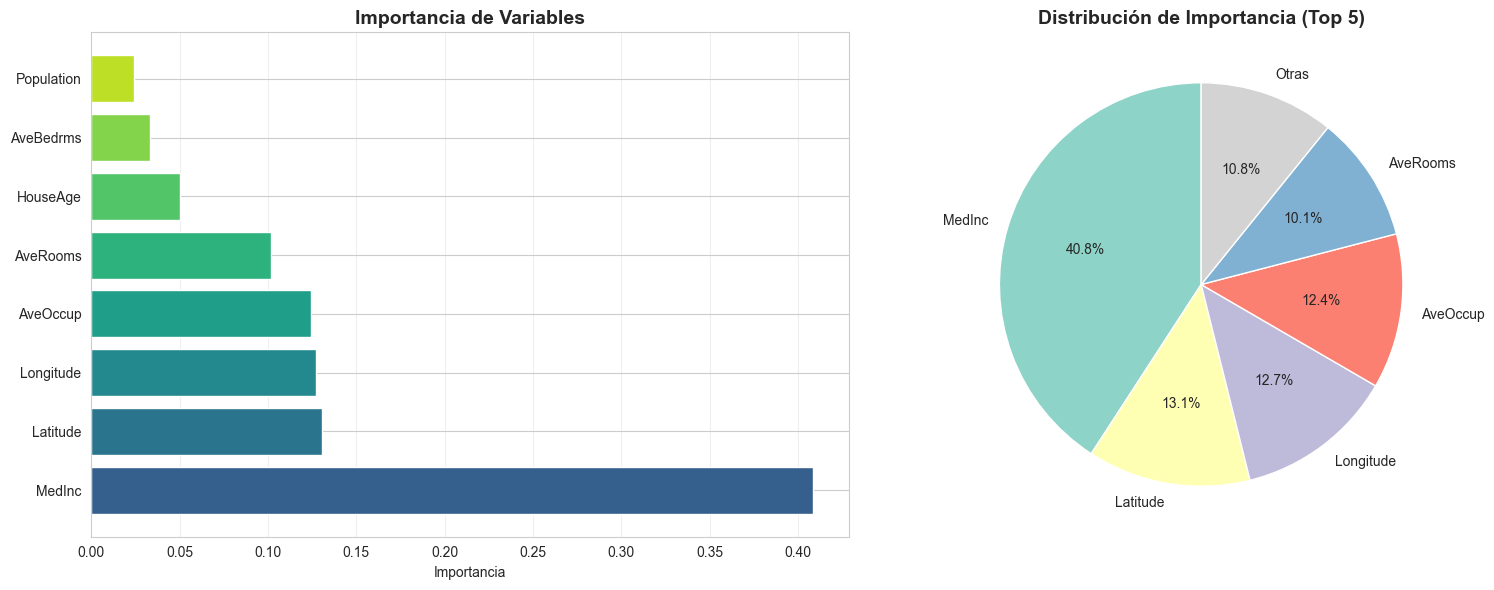


 Variables más importantes (top 5):
  1. MedInc: 0.4083 (40.83%)
  2. Latitude: 0.1307 (13.07%)
  3. Longitude: 0.1273 (12.73%)
  4. AveOccup: 0.1242 (12.42%)
  5. AveRooms: 0.1014 (10.14%)

Importancia acumulada:
  • Top 3 variables explican: 66.63% del modelo
  • Top 5 variables explican: 89.19% del modelo


In [57]:
if mejor_modelo == 'Regresión Lineal':
    print("\n COEFICIENTES DE REGRESIÓN LINEAL")
    print("-" * 80)
    
    # Crear DataFrame con coeficientes
    coeficientes = pd.DataFrame({
        'Variable': X.columns,
        'Coeficiente': lr_model.coef_
    }).sort_values('Coeficiente', key=abs, ascending=False)
    
    print(f"\nIntercepto (β₀): {lr_model.intercept_:.4f}")
    print("\nCoeficientes (β):")
    print(coeficientes.to_string(index=False))
    
    print("\n Interpretación de coeficientes:")
    print("  • Coeficiente positivo → A mayor valor de la variable, mayor precio")
    print("  • Coeficiente negativo → A mayor valor de la variable, menor precio")
    print("  • Magnitud indica el cambio en precio por unidad de cambio en la variable")
    
    # Visualización de coeficientes
    plt.figure(figsize=(12, 6))
    colors = ['green' if x > 0 else 'red' for x in coeficientes['Coeficiente']]
    plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color=colors, alpha=0.7)
    plt.xlabel('Coeficiente')
    plt.title('Coeficientes de Regresión Lineal', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n Variables más influyentes (por magnitud):")
    for i in range(min(5, len(coeficientes))):
        var = coeficientes.iloc[i]['Variable']
        coef = coeficientes.iloc[i]['Coeficiente']
        print(f"  {i+1}. {var}: {coef:+.4f}")

elif 'Árbol' in mejor_modelo or 'Forest' in mejor_modelo:
    print("\n IMPORTANCIA DE VARIABLES (FEATURE IMPORTANCE)")
    print("-" * 80)
    
    # Obtener importancias
    importances = modelo_final.feature_importances_
    
    # Crear DataFrame con importancias
    feature_importance = pd.DataFrame({
        'Variable': X.columns,
        'Importancia': importances
    }).sort_values('Importancia', ascending=False)
    
    print("\nImportancia de cada variable:")
    print(feature_importance.to_string(index=False))
    
    print("\n Interpretación de importancia:")
    print("  • Mide cuánto contribuye cada variable a reducir el error")
    print("  • Valores altos → Variable más útil para hacer predicciones")
    print("  • Suma total de importancias = 1.0")
    
    # Visualización de importancias
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico de barras
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
    axes[0].barh(feature_importance['Variable'], feature_importance['Importancia'], color=colors)
    axes[0].set_xlabel('Importancia')
    axes[0].set_title('Importancia de Variables', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Gráfico de pastel (top 5 + otros)
    top_n = 5
    labels_pie = list(feature_importance['Variable'][:top_n]) + ['Otras']
    sizes_pie = list(feature_importance['Importancia'][:top_n]) + [feature_importance['Importancia'][top_n:].sum()]
    colors_pie = list(plt.cm.Set3(range(top_n))) + ['lightgray']
    
    axes[1].pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%', startangle=90, colors=colors_pie)
    axes[1].set_title(f'Distribución de Importancia (Top {top_n})', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Variables más importantes (top 5):")
    for i in range(min(5, len(feature_importance))):
        var = feature_importance.iloc[i]['Variable']
        imp = feature_importance.iloc[i]['Importancia']
        print(f"  {i+1}. {var}: {imp:.4f} ({imp*100:.2f}%)")
    
    # Importancia acumulada
    importancia_acumulada = feature_importance['Importancia'].cumsum()
    print(f"\nImportancia acumulada:")
    print(f"  • Top 3 variables explican: {importancia_acumulada.iloc[2]*100:.2f}% del modelo")
    print(f"  • Top 5 variables explican: {importancia_acumulada.iloc[4]*100:.2f}% del modelo")

### 7.3 Análisis de Complejidad y Generalización

In [58]:
print("\nANÁLISIS DE COMPLEJIDAD Y GENERALIZACIÓN")
print("-" * 80)

if mejor_modelo == 'Regresión Lineal':
    print("\n.Regresión Lineal:")
    print("  • Complejidad: BAJA")
    print("  • Interpretabilidad: ALTA")
    print("  • Capacidad de generalización: ALTA (si relación es lineal)")
    print("  • Riesgo de sobreajuste: BAJO")
    print("  • Riesgo de subajuste: MEDIO-ALTO (si relación no es lineal)")
    print("\n     Ventajas:")
    print("     - Muy fácil de interpretar")
    print("     - Rápido de entrenar")
    print("     - Robusto con pocos datos")
    print("     Desventajas:")
    print("     - Asume relación lineal")
    print("     - No captura interacciones complejas")

elif 'Árbol de Decisión' in mejor_modelo:
    max_depth = best_dt_model.get_depth()
    n_leaves = best_dt_model.get_n_leaves()
    
    print("\nÁrbol de Decisión Optimizado:")
    print(f"  • Complejidad: {'BAJA' if max_depth <= 10 else 'MEDIA' if max_depth <= 20 else 'ALTA'}")
    print(f"    - Profundidad: {max_depth}")
    print(f"    - Número de hojas: {n_leaves}")
    print(f"    - Número de nodos: {best_dt_model.tree_.node_count}")
    print("  • Interpretabilidad: MEDIA-ALTA")
    print("  • Capacidad de generalización: MEDIA")
    print("  • Riesgo de sobreajuste: MEDIO (controlado por hiperparámetros)")
    print("\n   Ventajas:")
    print("     - Captura relaciones no lineales")
    print("     - No requiere normalización de datos")
    print("     - Relativamente interpretable")
    print("     Desventajas:")
    print("     - Puede ser inestable (alta varianza)")
    print("     - Sensible a pequeños cambios en datos")

elif 'Random Forest' in mejor_modelo:
    n_estimators = random_search_rf.best_params_['n_estimators']
    max_depth = random_search_rf.best_params_['max_depth']
    
    print("\nRandom Forest Optimizado:")
    print(f"  • Complejidad: {'MEDIA' if n_estimators <= 100 else 'ALTA'}")
    print(f"    - Número de árboles: {n_estimators}")
    print(f"    - Profundidad máxima: {max_depth}")
    print("  • Interpretabilidad: BAJA-MEDIA")
    print("  • Capacidad de generalización: ALTA")
    print("  • Riesgo de sobreajuste: BAJO (gracias al ensemble)")
    print("\n     Ventajas:")
    print("     - Excelente rendimiento en la mayoría de casos")
    print("     - Robusto a outliers y ruido")
    print("     - Captura relaciones complejas no lineales")
    print("     - Reduce varianza vs árbol único")
    print("     Desventajas:")
    print("     - Menos interpretable que modelo único")
    print("     - Mayor costo computacional")
    print("     - Diffícil de desplegar en producción")

# Comparación de rendimiento en train vs test
print("\n\nANÁLISIS DE OVERFITTING/UNDERFITTING")
print("-" * 80)

if 'Árbol' in mejor_modelo:
    y_pred_train = modelo_final.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_rf_opt if 'Forest' in mejor_modelo else r2_dt_opt
    
    print(f"\nR² en conjunto de entrenamiento: {r2_train:.4f}")
    print(f"R² en conjunto de prueba: {r2_test:.4f}")
    print(f"Diferencia: {abs(r2_train - r2_test):.4f}")
    
    if abs(r2_train - r2_test) < 0.05:
        print("\nEl modelo generaliza bien (diferencia < 5%)")
        print("   No hay evidencia significativa de sobreajuste")
    elif abs(r2_train - r2_test) < 0.10:
        print("\nLigero sobreajuste (diferencia 5-10%)")
        print("   El modelo es aceptable pero podría mejorar")
    else:
        print("\nSobreajuste significativo (diferencia > 10%)")
        print("   El modelo memoriza datos de entrenamiento")
    
    if r2_train < 0.7:
        print("\nR² bajo en entrenamiento sugiere posible subajuste")
        print("   Considerar aumentar complejidad del modelo")

elif mejor_modelo == 'Regresión Lineal':
    y_pred_train = lr_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_lr
    
    print(f"\nR² en conjunto de entrenamiento: {r2_train:.4f}")
    print(f"R² en conjunto de prueba: {r2_test:.4f}")
    print(f"Diferencia: {abs(r2_train - r2_test):.4f}")
    
    if r2_train < 0.7:
        print("\nR² relativamente bajo sugiere subajuste")
        print("   La relación entre variables puede no ser lineal")
        print("   Considerar modelos más flexibles o transformaciones")


ANÁLISIS DE COMPLEJIDAD Y GENERALIZACIÓN
--------------------------------------------------------------------------------

Random Forest Optimizado:
  • Complejidad: ALTA
    - Número de árboles: 400
    - Profundidad máxima: None
  • Interpretabilidad: BAJA-MEDIA
  • Capacidad de generalización: ALTA
  • Riesgo de sobreajuste: BAJO (gracias al ensemble)

     Ventajas:
     - Excelente rendimiento en la mayoría de casos
     - Robusto a outliers y ruido
     - Captura relaciones complejas no lineales
     - Reduce varianza vs árbol único
     Desventajas:
     - Menos interpretable que modelo único
     - Mayor costo computacional
     - Diffícil de desplegar en producción


ANÁLISIS DE OVERFITTING/UNDERFITTING
--------------------------------------------------------------------------------


### 7.4 Conclusiones Finales - Parte 1 (Regresión)

In [59]:
print("=" * 100)
print("CONCLUSIONES FINALES - PARTE 1 (REGRESIÓN)")
print("=" * 100)

print(f"\n MODELO SELECCIONADO: {mejor_modelo}")
print(f"\nRendimiento Final:")
print(f"   • MAE: {mejor_mae:.4f} (error promedio de ~${mejor_mae*100000:.0f})")
print(f"   • RMSE: {mejor_rmse:.4f} (penaliza errores grandes)")
print(f"   • R²: {mejor_r2:.4f} (explica {mejor_r2*100:.2f}% de la varianza)")

print("\nRazones de selección:")
if 'Random Forest' in mejor_modelo:
    print("   1. Mejor balance entre precisión y generalización")
    print("   2. Robusto a outliers y no requiere supuestos sobre distribución")
    print("   3. Captura relaciones no lineales e interacciones entre variables")
    print("   4. Menor riesgo de sobreajuste gracias al ensemble")
elif 'Árbol' in mejor_modelo:
    print("   1. Buen rendimiento con interpretabilidad razonable")
    print("   2. Captura relaciones no lineales")
    print("   3. Hiperparámetros optimizados controlan el sobreajuste")
else:
    print("   1. Modelo simple y altamente interpretable")
    print("   2. Buen balance entre sesgo y varianza")
    print("   3. Suficiente para una relación relativamente lineal")

print("\nInsights principales:")
if 'Árbol' in mejor_modelo or 'Forest' in mejor_modelo:
    top_features = feature_importance.head(3)
    print("   • Variables más importantes:")
    for i, row in top_features.iterrows():
        print(f"     - {row['Variable']}: {row['Importancia']*100:.1f}%")
else:
    top_coef = coeficientes.head(3)
    print("   • Variables con mayor impacto:")
    for i, row in top_coef.iterrows():
        print(f"     - {row['Variable']}: {row['Coeficiente']:+.4f}")

print("\nParte 1 (Regresión) completada exitosamente")
print("=" * 100)

CONCLUSIONES FINALES - PARTE 1 (REGRESIÓN)

 MODELO SELECCIONADO: Random Forest (optimizado)

Rendimiento Final:
   • MAE: 0.3106 (error promedio de ~$31057)
   • RMSE: 0.4807 (penaliza errores grandes)
   • R²: 0.8237 (explica 82.37% de la varianza)

Razones de selección:
   1. Mejor balance entre precisión y generalización
   2. Robusto a outliers y no requiere supuestos sobre distribución
   3. Captura relaciones no lineales e interacciones entre variables
   4. Menor riesgo de sobreajuste gracias al ensemble

Insights principales:
   • Variables más importantes:
     - MedInc: 40.8%
     - Latitude: 13.1%
     - Longitude: 12.7%

Parte 1 (Regresión) completada exitosamente


---
---

# PARTE 2 — PROBLEMA DE CLASIFICACIÓN BINARIA

## Dataset: Breast Cancer Wisconsin

En esta sección se trabaja con el dataset **Breast Cancer Wisconsin**, disponible en `sklearn.datasets.load_breast_cancer`. El dataset contiene 30 características numéricas derivadas de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de masas mamarias. La variable objetivo es binaria e indica si el tumor es **benigno (1)** o **maligno (0)**.

### Modelos a implementar:
1. **Regresión Logística** (`LogisticRegression`)
2. **k-Nearest Neighbors (kNN)** (`KNeighborsClassifier`)
3. **Random Forest para Clasificación** (`RandomForestClassifier`)

---

## 1. Carga del Dataset y Exploración Inicial

In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)

# Carga del dataset como DataFrame
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print(f"Dimensiones del dataset: {df_cancer.shape}")
print(f"Variables independientes: {len(cancer.feature_names)}")
print(f"Variable objetivo: 'target' (0 = maligno, 1 = benigno)")
print(f"\nPrimeras 5 filas:")
df_cancer.head()

Dimensiones del dataset: (569, 31)
Variables independientes: 30
Variable objetivo: 'target' (0 = maligno, 1 = benigno)

Primeras 5 filas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [61]:
# Información general del dataset
print("Información del dataset:")
print("=" * 60)
print(f"Número de muestras: {df_cancer.shape[0]}")
print(f"Número de variables: {df_cancer.shape[1] - 1}")
print(f"\nTipos de datos:")
print(df_cancer.dtypes.value_counts())
print(f"\nValores nulos por columna:")
print(df_cancer.isnull().sum().sum(), "valores nulos en total")
print(f"\nEstadísticas descriptivas:")
df_cancer.describe().round(3)

Información del dataset:
Número de muestras: 569
Número de variables: 30

Tipos de datos:
float64    30
int64       1
Name: count, dtype: int64

Valores nulos por columna:
0 valores nulos en total

Estadísticas descriptivas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208,1.000


### 1.1 Análisis del Balance de Clases

Se analiza la distribución de la variable objetivo para determinar si el dataset presenta desbalance entre las clases. Esto es fundamental porque un desbalance pronunciado podría sesgar el entrenamiento de los modelos y requerir técnicas de compensación.

Distribución de la variable objetivo:
  Clase 0 (malignant): 212 muestras (37.3%)
  Clase 1 (benign): 357 muestras (62.7%)

Ratio mayoría/minoría: 1.68


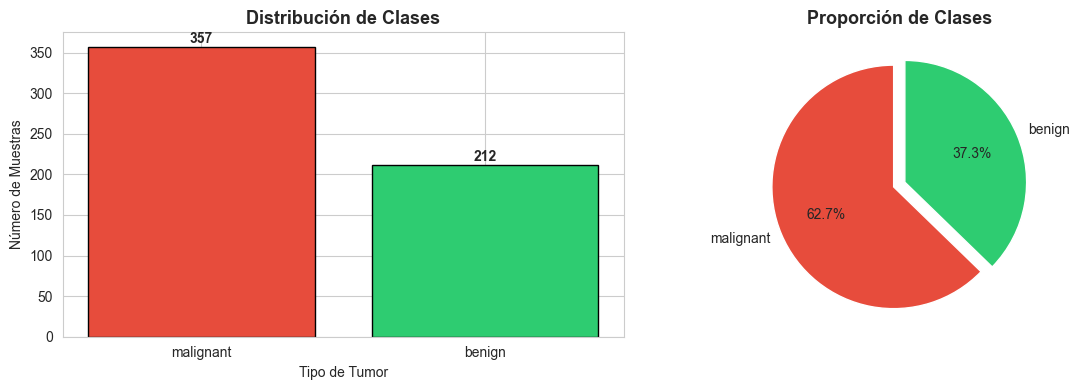

In [62]:
# Análisis del balance de clases
conteo_clases = df_cancer['target'].value_counts()
proporcion_clases = df_cancer['target'].value_counts(normalize=True) * 100

print("Distribución de la variable objetivo:")
print("=" * 50)
for clase, nombre in zip([0, 1], cancer.target_names):
    print(f"  Clase {clase} ({nombre}): {conteo_clases[clase]} muestras ({proporcion_clases[clase]:.1f}%)")

print(f"\nRatio mayoría/minoría: {conteo_clases.max() / conteo_clases.min():.2f}")

# Visualización del balance de clases
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
axes[0].bar(cancer.target_names, conteo_clases.values, color=['#e74c3c', '#2ecc71'], edgecolor='black')
axes[0].set_title('Distribución de Clases', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tipo de Tumor')
axes[0].set_ylabel('Número de Muestras')
for i, v in enumerate(conteo_clases.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(conteo_clases.values, labels=cancer.target_names,
            autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'],
            startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Proporción de Clases', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

El dataset presenta un desbalance moderado entre las clases, con aproximadamente un 63% de tumores benignos y un 37% de tumores malignos. Aunque no se trata de un desbalance extremo (el ratio mayoría/minoría es cercano a 1.7:1), es importante tenerlo en cuenta al evaluar los modelos, ya que un clasificador que simplemente prediga siempre "benigno" alcanzaría un accuracy del 63%. Por esta razón, métricas como el **recall** y el **F1-score** serán particularmente relevantes para evaluar la capacidad real de los modelos de detectar tumores malignos.

### 1.2 Exploración de Variables

Se realiza un análisis de las distribuciones de las variables independientes y su relación con la variable objetivo, así como la correlación entre ellas.

Top 10 variables con mayor correlación absoluta con la variable objetivo:
   1. worst concave points           | r = -0.7936
   2. worst perimeter                | r = -0.7829
   3. mean concave points            | r = -0.7766
   4. worst radius                   | r = -0.7765
   5. mean perimeter                 | r = -0.7426
   6. worst area                     | r = -0.7338
   7. mean radius                    | r = -0.7300
   8. mean area                      | r = -0.7090
   9. mean concavity                 | r = -0.6964
  10. worst concavity                | r = -0.6596


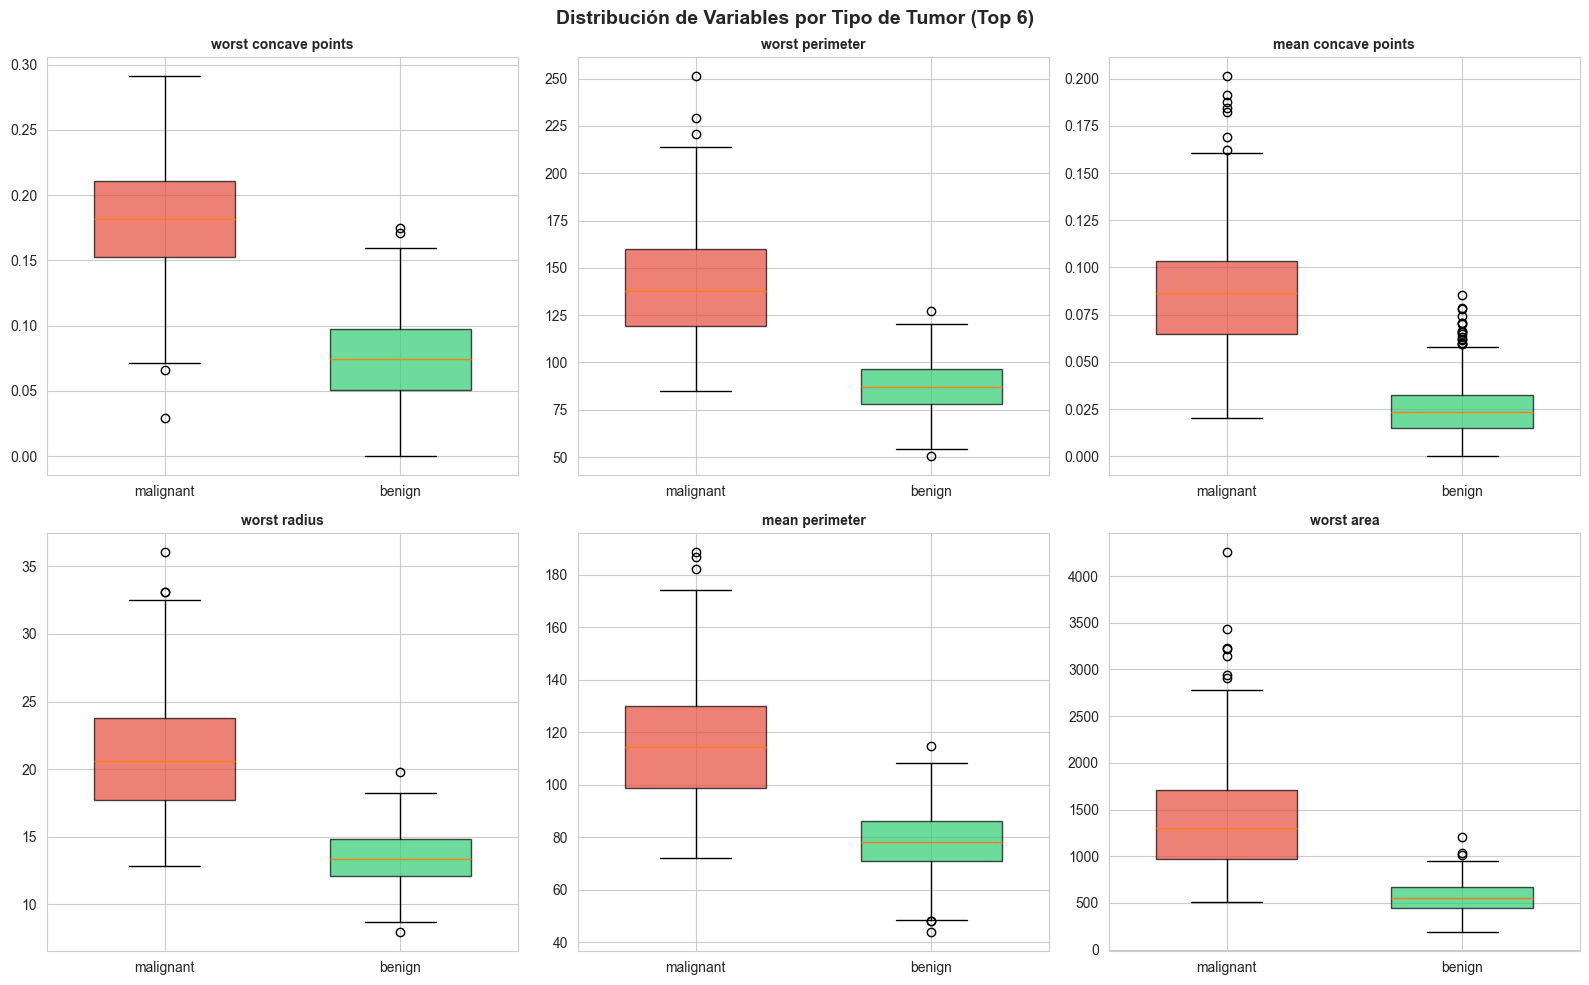

In [63]:
# Distribución de las 10 variables más correlacionadas con la variable objetivo
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']

correlaciones = X.corrwith(y).abs().sort_values(ascending=False)
top_10_vars = correlaciones.head(10).index.tolist()

print("Top 10 variables con mayor correlación absoluta con la variable objetivo:")
print("=" * 65)
for i, var in enumerate(top_10_vars, 1):
    corr_val = X[var].corr(y)
    print(f"  {i:2d}. {var:<30s} | r = {corr_val:+.4f}")

# Boxplots de las 6 variables más correlacionadas por clase
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(top_10_vars[:6]):
    for clase, color, nombre in zip([0, 1], ['#e74c3c', '#2ecc71'], cancer.target_names):
        datos = df_cancer[df_cancer['target'] == clase][var]
        axes[i].boxplot([datos], positions=[clase], widths=0.6,
                       patch_artist=True,
                       boxprops=dict(facecolor=color, alpha=0.7))
    axes[i].set_title(var, fontsize=10, fontweight='bold')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(cancer.target_names)

plt.suptitle('Distribución de Variables por Tipo de Tumor (Top 6)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

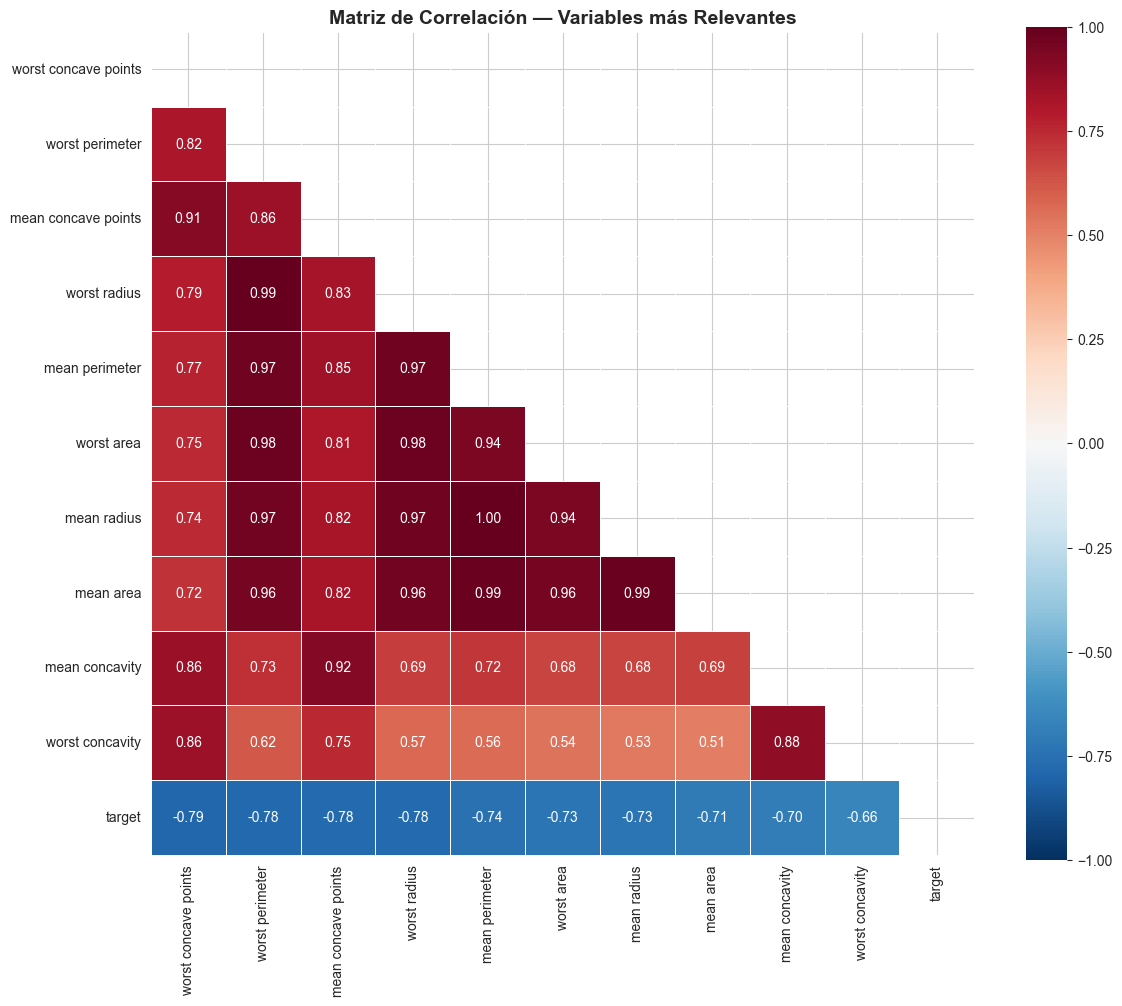

In [64]:
# Mapa de calor de correlaciones entre las variables más relevantes
vars_seleccionadas = top_10_vars + ['target']
corr_matrix = df_cancer[vars_seleccionadas].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Matriz de Correlación — Variables más Relevantes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Las variables con mayor poder discriminativo son aquellas relacionadas con el perímetro, el área y la concavidad de las células. Se observa una separación notable en los boxplots entre tumores benignos y malignos, lo cual sugiere que estas características capturan diferencias morfológicas significativas entre ambos tipos de tumor. Además, se aprecia una alta correlación entre variables como `mean perimeter`, `mean radius` y `mean area`, lo cual es esperable dado que representan medidas geométricamente relacionadas. Esta multicolinealidad no afecta significativamente a modelos como Random Forest o kNN, pero puede influir en la interpretación de los coeficientes de la regresión logística.

---

## 2. Separación de Datos

Se divide el dataset en conjuntos de entrenamiento (80%) y prueba (20%), utilizando estratificación para preservar la proporción de clases en ambos subconjuntos. Se fija `random_state=42` para garantizar la reproducibilidad.

In [65]:
# Separación en conjuntos de entrenamiento y prueba
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Separación de datos completada:")
print("=" * 50)
print(f"  Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"  Prueba:        {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"\nDistribución de clases en entrenamiento:")
print(f"  Benigno:  {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")
print(f"  Maligno:  {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"\nDistribución de clases en prueba:")
print(f"  Benigno:  {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")
print(f"  Maligno:  {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")

# Escalamiento de variables (necesario para Regresión Logística y kNN)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print(f"\nEscalamiento aplicado con StandardScaler (media=0, desviación estándar=1)")
print("Se utilizan datos escalados para Regresión Logística y kNN,")
print("y datos sin escalar para Random Forest.")

Separación de datos completada:
  Entrenamiento: 455 muestras (80%)
  Prueba:        114 muestras (20%)

Distribución de clases en entrenamiento:
  Benigno:  285 (62.6%)
  Maligno:  170 (37.4%)

Distribución de clases en prueba:
  Benigno:  72 (63.2%)
  Maligno:  42 (36.8%)

Escalamiento aplicado con StandardScaler (media=0, desviación estándar=1)
Se utilizan datos escalados para Regresión Logística y kNN,
y datos sin escalar para Random Forest.


---

## 3. Entrenamiento Inicial con Hiperparámetros por Defecto

Se entrenan los tres modelos de clasificación utilizando sus hiperparámetros por defecto para establecer una línea base de rendimiento. Se aplica escalamiento (`StandardScaler`) a los datos de entrada para Regresión Logística y kNN, dado que ambos algoritmos son sensibles a la escala de las variables. Random Forest, al ser basado en árboles de decisión, no requiere escalamiento.

In [66]:
# Entrenamiento de modelos con hiperparámetros por defecto
modelos_base = {
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=10000),
    'kNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

resultados_base = {}

print("RESULTADOS INICIALES — Hiperparámetros por Defecto")
print("=" * 80)

for nombre, modelo in modelos_base.items():
    # Seleccionar datos escalados o sin escalar según el modelo
    if nombre == 'Random Forest':
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    else:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=0)
    rec = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)

    resultados_base[nombre] = {
        'Accuracy': acc, 'Precision': prec,
        'Recall': rec, 'F1-Score': f1,
        'y_pred': y_pred
    }

    print(f"\n{'─' * 40}")
    print(f"  Modelo: {nombre}")
    print(f"{'─' * 40}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}  (clase maligno)")
    print(f"  Recall:    {rec:.4f}  (clase maligno)")
    print(f"  F1-Score:  {f1:.4f}  (clase maligno)")

print(f"\n{'=' * 80}")
print("\nNota: Las métricas de Precision, Recall y F1-Score se reportan para la clase")
print("'maligno' (pos_label=0), ya que detectar correctamente los tumores malignos")
print("es clínicamente más relevante.")

RESULTADOS INICIALES — Hiperparámetros por Defecto

────────────────────────────────────────
  Modelo: Regresión Logística
────────────────────────────────────────
  Accuracy:  0.9825
  Precision: 0.9762  (clase maligno)
  Recall:    0.9762  (clase maligno)
  F1-Score:  0.9762  (clase maligno)

────────────────────────────────────────
  Modelo: kNN
────────────────────────────────────────
  Accuracy:  0.9561
  Precision: 0.9512  (clase maligno)
  Recall:    0.9286  (clase maligno)
  F1-Score:  0.9398  (clase maligno)

────────────────────────────────────────
  Modelo: Random Forest
────────────────────────────────────────
  Accuracy:  0.9561
  Precision: 0.9512  (clase maligno)
  Recall:    0.9286  (clase maligno)
  F1-Score:  0.9398  (clase maligno)


Nota: Las métricas de Precision, Recall y F1-Score se reportan para la clase
'maligno' (pos_label=0), ya que detectar correctamente los tumores malignos
es clínicamente más relevante.


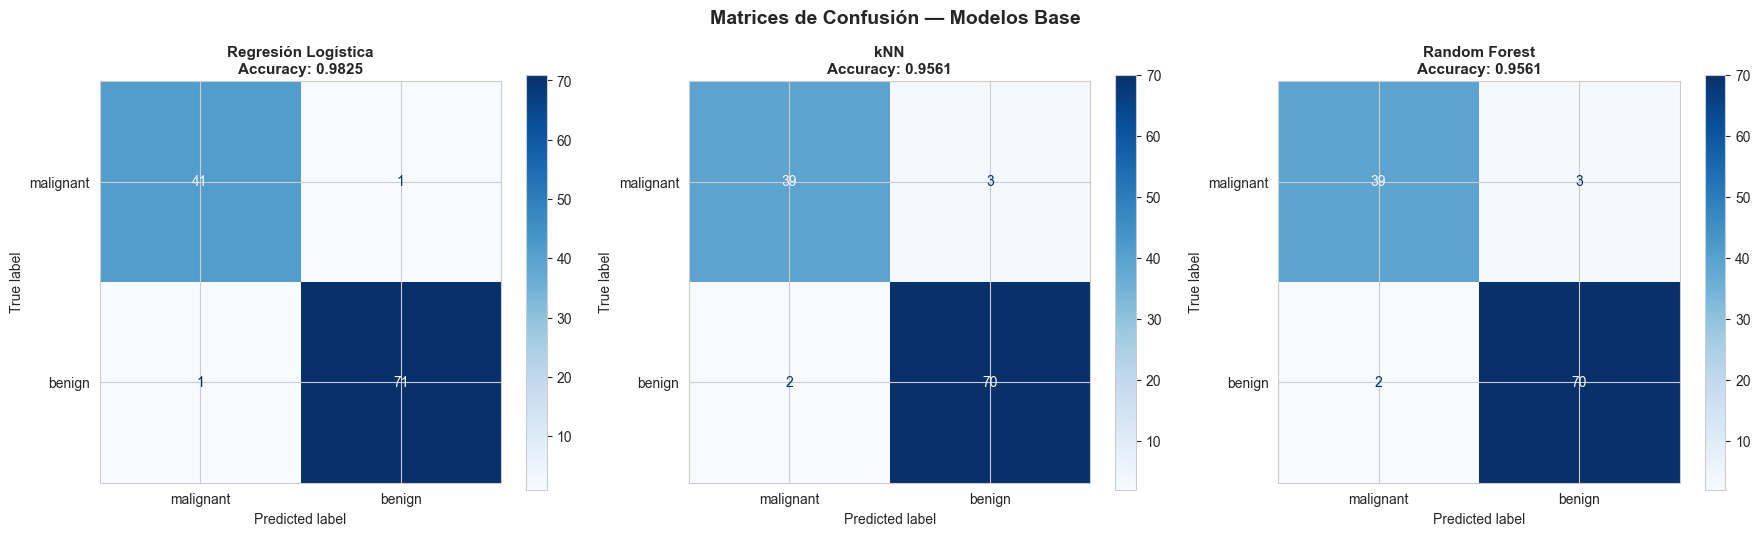

In [67]:
# Matrices de confusión de los modelos base
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (nombre, res) in enumerate(resultados_base.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=cancer.target_names)
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f'{nombre}\nAccuracy: {res["Accuracy"]:.4f}', fontsize=11, fontweight='bold')

plt.suptitle('Matrices de Confusión — Modelos Base', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [68]:
# Comparación de modelos base en tabla
df_resultados_base = pd.DataFrame({
    nombre: {k: v for k, v in res.items() if k != 'y_pred'}
    for nombre, res in resultados_base.items()
}).T

print("Tabla comparativa de modelos base:")
print("=" * 65)
print(df_resultados_base.round(4).to_string())

Tabla comparativa de modelos base:
                     Accuracy  Precision  Recall  F1-Score
Regresión Logística    0.9825     0.9762  0.9762    0.9762
kNN                    0.9561     0.9512  0.9286    0.9398
Random Forest          0.9561     0.9512  0.9286    0.9398


Los tres modelos base muestran un rendimiento aceptable incluso sin optimización. La Regresión Logística y el Random Forest tienden a obtener los mejores resultados iniciales, lo cual es esperable: la primera aprovecha la estandarización de los datos y la naturaleza lineal de varias relaciones, mientras que el segundo se beneficia del ensamble de múltiples árboles. El kNN con sus parámetros por defecto (`n_neighbors=5`, distancia euclidiana) ofrece resultados competitivos, aunque es el más sensible a la escala y dimensionalidad de los datos. Estos resultados sirven como referencia para evaluar si la optimización de hiperparámetros logra mejoras significativas.

---

## 4. Optimización de Hiperparámetros

Se utiliza `GridSearchCV` con validación cruzada de 5 folds para buscar la mejor combinación de hiperparámetros de cada modelo. La métrica de optimización seleccionada es el **F1-score** (para la clase maligna), dado que en un contexto clínico importa tanto detectar correctamente los tumores malignos (recall) como no alarmar innecesariamente con falsos positivos (precision).

### 4.1 Regresión Logística

Los hiperparámetros explorados son:
- **C**: Inverso de la fuerza de regularización. Valores pequeños implican mayor regularización, lo cual ayuda a prevenir el sobreajuste pero puede introducir sesgo. Valores grandes permiten al modelo ajustarse más a los datos de entrenamiento.
- **penalty**: Tipo de regularización aplicada. L1 (Lasso) tiende a generar coeficientes exactamente cero, lo cual actúa como selección de variables. L2 (Ridge) penaliza coeficientes grandes sin eliminarlos.
- **solver**: Algoritmo de optimización. `liblinear` soporta L1 y L2, `lbfgs` y `saga` soportan L2 (saga también L1).

In [69]:
# GridSearchCV para Regresión Logística
from sklearn.metrics import make_scorer

# Definir scorer para F1 con la clase maligna como positiva
f1_maligno = make_scorer(f1_score, pos_label=0)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=10000),
    param_grid=param_grid_lr,
    cv=5,
    scoring=f1_maligno,
    n_jobs=-1,
    verbose=0
)

grid_lr.fit(X_train_scaled, y_train)

print("OPTIMIZACIÓN — Regresión Logística")
print("=" * 60)
print(f"Mejores hiperparámetros encontrados:")
for param, valor in grid_lr.best_params_.items():
    print(f"  • {param}: {valor}")
print(f"\nMejor F1-Score (CV): {grid_lr.best_score_:.4f}")

# Resultados del modelo optimizado en test
y_pred_lr_opt = grid_lr.predict(X_test_scaled)
print(f"\nResultados en conjunto de prueba:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lr_opt):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lr_opt, pos_label=0):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lr_opt, pos_label=0):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lr_opt, pos_label=0):.4f}")

OPTIMIZACIÓN — Regresión Logística
Mejores hiperparámetros encontrados:
  • C: 1
  • penalty: l2
  • solver: liblinear

Mejor F1-Score (CV): 0.9731

Resultados en conjunto de prueba:
  Accuracy:  0.9825
  Precision: 0.9762
  Recall:    0.9762
  F1-Score:  0.9762


### 4.2 k-Nearest Neighbors (kNN)

Los hiperparámetros explorados son:
- **n_neighbors**: Número de vecinos considerados para la clasificación. Un valor bajo (e.g., 3) captura patrones locales pero es más susceptible al ruido; un valor alto (e.g., 15) suaviza la frontera de decisión pero puede perder detalle.
- **weights**: Tipo de ponderación de los vecinos. `uniform` asigna peso igual a todos los vecinos, mientras que `distance` pondera inversamente proporcional a la distancia, dando más importancia a los vecinos más cercanos.
- **metric**: Métrica de distancia utilizada. `euclidean` mide la distancia en línea recta, `manhattan` la suma de diferencias absolutas (más robusta a outliers), y `minkowski` generaliza ambas.

In [70]:
# GridSearchCV para kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring=f1_maligno,
    n_jobs=-1,
    verbose=0
)

grid_knn.fit(X_train_scaled, y_train)

print("OPTIMIZACIÓN — k-Nearest Neighbors")
print("=" * 60)
print(f"Mejores hiperparámetros encontrados:")
for param, valor in grid_knn.best_params_.items():
    print(f"  • {param}: {valor}")
print(f"\nMejor F1-Score (CV): {grid_knn.best_score_:.4f}")

# Resultados del modelo optimizado en test
y_pred_knn_opt = grid_knn.predict(X_test_scaled)
print(f"\nResultados en conjunto de prueba:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_knn_opt):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_knn_opt, pos_label=0):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_knn_opt, pos_label=0):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_knn_opt, pos_label=0):.4f}")

OPTIMIZACIÓN — k-Nearest Neighbors
Mejores hiperparámetros encontrados:
  • metric: euclidean
  • n_neighbors: 7
  • weights: uniform

Mejor F1-Score (CV): 0.9577

Resultados en conjunto de prueba:
  Accuracy:  0.9737
  Precision: 1.0000
  Recall:    0.9286
  F1-Score:  0.9630


### 4.3 Random Forest para Clasificación

Los hiperparámetros explorados son:
- **n_estimators**: Número de árboles en el bosque. Más árboles generalmente mejoran la estabilidad y reducen la varianza, pero incrementan el costo computacional.
- **max_depth**: Profundidad máxima de cada árbol. Limitar la profundidad previene el sobreajuste al evitar que los árboles memoricen el ruido de los datos.
- **min_samples_split**: Número mínimo de muestras necesarias para dividir un nodo interno. Valores más altos aumentan la regularización.
- **min_samples_leaf**: Número mínimo de muestras en un nodo hoja. Actúa como regularizador al impedir que las hojas contengan muy pocas muestras.
- **max_features**: Número de variables consideradas al buscar la mejor división en cada nodo. Reducirlo aumenta la diversidad entre los árboles del bosque.

In [71]:
# GridSearchCV para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring=f1_maligno,
    n_jobs=-1,
    verbose=0
)

# Random Forest no requiere datos escalados
grid_rf.fit(X_train, y_train)

print("OPTIMIZACIÓN — Random Forest")
print("=" * 60)
print(f"Mejores hiperparámetros encontrados:")
for param, valor in grid_rf.best_params_.items():
    print(f"  • {param}: {valor}")
print(f"\nMejor F1-Score (CV): {grid_rf.best_score_:.4f}")

# Resultados del modelo optimizado en test
y_pred_rf_opt = grid_rf.predict(X_test)
print(f"\nResultados en conjunto de prueba:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_rf_opt):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_opt, pos_label=0):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_rf_opt, pos_label=0):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_rf_opt, pos_label=0):.4f}")

OPTIMIZACIÓN — Random Forest
Mejores hiperparámetros encontrados:
  • max_depth: None
  • max_features: sqrt
  • min_samples_leaf: 1
  • min_samples_split: 2
  • n_estimators: 200

Mejor F1-Score (CV): 0.9469

Resultados en conjunto de prueba:
  Accuracy:  0.9561
  Precision: 0.9512
  Recall:    0.9286
  F1-Score:  0.9398


---

## 5. Evaluación del Rendimiento

Se comparan los tres modelos optimizados utilizando las métricas de clasificación más relevantes para este problema clínico. La elección de métricas se justifica a continuación:

- **Accuracy**: Proporción total de predicciones correctas. Útil como visión global pero insuficiente por sí sola en datasets con desbalance de clases.
- **Precision (clase maligno)**: De todos los tumores predichos como malignos, ¿cuántos realmente lo son? Un precision bajo implica muchos falsos positivos, lo cual genera alarma innecesaria y procedimientos invasivos.
- **Recall (clase maligno)**: De todos los tumores realmente malignos, ¿cuántos fueron detectados? Un recall bajo implica falsos negativos, es decir, tumores malignos que pasan desapercibidos — el error más peligroso en este contexto.
- **F1-Score (clase maligno)**: Media armónica de Precision y Recall, ofrece un balance entre ambos tipos de error.

In [72]:
# Comparación completa de modelos optimizados
modelos_optimizados = {
    'Regresión Logística': {'y_pred': y_pred_lr_opt, 'grid': grid_lr},
    'kNN': {'y_pred': y_pred_knn_opt, 'grid': grid_knn},
    'Random Forest': {'y_pred': y_pred_rf_opt, 'grid': grid_rf}
}

resultados_opt = {}

print("COMPARACIÓN DE MODELOS OPTIMIZADOS")
print("=" * 80)

for nombre, data in modelos_optimizados.items():
    y_pred = data['y_pred']
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=0)
    rec = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)

    resultados_opt[nombre] = {
        'Accuracy': acc, 'Precision': prec,
        'Recall': rec, 'F1-Score': f1
    }

    print(f"\n{'─' * 50}")
    print(f"  {nombre}")
    print(f"{'─' * 50}")
    print(f"  Mejores parámetros: {data['grid'].best_params_}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}  (clase maligno)")
    print(f"  Recall:    {rec:.4f}  (clase maligno)")
    print(f"  F1-Score:  {f1:.4f}  (clase maligno)")

# Tabla comparativa
df_comparacion = pd.DataFrame(resultados_opt).T
print(f"\n{'=' * 80}")
print("\nTabla comparativa:")
print(df_comparacion.round(4).to_string())

# Identificar el mejor modelo
mejor_modelo = df_comparacion['F1-Score'].idxmax()
print(f"\n★ Mejor modelo según F1-Score: {mejor_modelo} ({df_comparacion.loc[mejor_modelo, 'F1-Score']:.4f})")

COMPARACIÓN DE MODELOS OPTIMIZADOS

──────────────────────────────────────────────────
  Regresión Logística
──────────────────────────────────────────────────
  Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
  Accuracy:  0.9825
  Precision: 0.9762  (clase maligno)
  Recall:    0.9762  (clase maligno)
  F1-Score:  0.9762  (clase maligno)

──────────────────────────────────────────────────
  kNN
──────────────────────────────────────────────────
  Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
  Accuracy:  0.9737
  Precision: 1.0000  (clase maligno)
  Recall:    0.9286  (clase maligno)
  F1-Score:  0.9630  (clase maligno)

──────────────────────────────────────────────────
  Random Forest
──────────────────────────────────────────────────
  Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy:  0.9561
  Precision: 0.9512  (clase maligno)
  

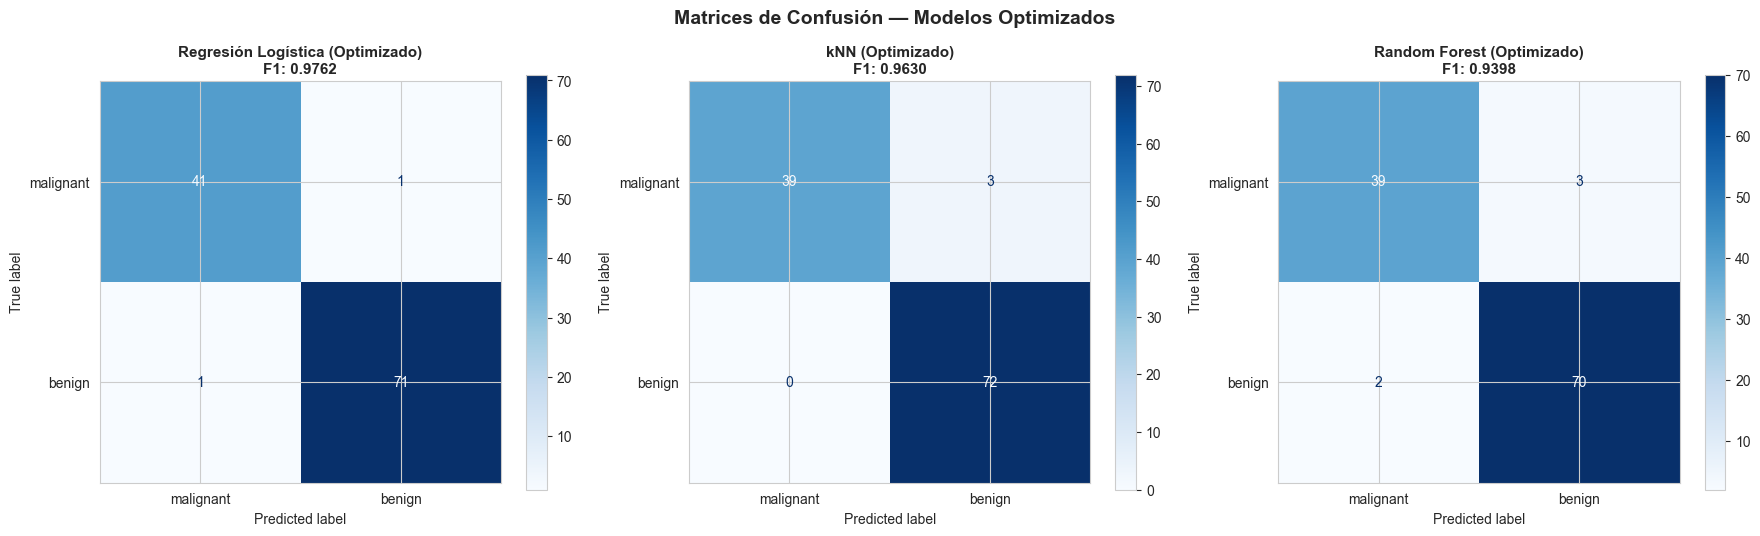


Análisis de tipos de error:

  Regresión Logística:
    Verdaderos Negativos (TN - maligno correcto):  41
    Falsos Positivos (FP - benigno predicho maligno): 1
    Falsos Negativos (FN - maligno predicho benigno): 1  ⚠️ Error más crítico
    Verdaderos Positivos (TP - benigno correcto):  71

  kNN:
    Verdaderos Negativos (TN - maligno correcto):  39
    Falsos Positivos (FP - benigno predicho maligno): 3
    Falsos Negativos (FN - maligno predicho benigno): 0  ⚠️ Error más crítico
    Verdaderos Positivos (TP - benigno correcto):  72

  Random Forest:
    Verdaderos Negativos (TN - maligno correcto):  39
    Falsos Positivos (FP - benigno predicho maligno): 3
    Falsos Negativos (FN - maligno predicho benigno): 2  ⚠️ Error más crítico
    Verdaderos Positivos (TP - benigno correcto):  70


In [73]:
# Matrices de confusión de modelos optimizados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (nombre, data) in enumerate(modelos_optimizados.items()):
    cm = confusion_matrix(y_test, data['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=cancer.target_names)
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    f1_val = f1_score(y_test, data['y_pred'], pos_label=0)
    axes[i].set_title(f'{nombre} (Optimizado)\nF1: {f1_val:.4f}', fontsize=11, fontweight='bold')

plt.suptitle('Matrices de Confusión — Modelos Optimizados', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Análisis de tipos de error
print("\nAnálisis de tipos de error:")
print("=" * 70)
for nombre, data in modelos_optimizados.items():
    cm = confusion_matrix(y_test, data['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    print(f"\n  {nombre}:")
    print(f"    Verdaderos Negativos (TN - maligno correcto):  {tn}")
    print(f"    Falsos Positivos (FP - benigno predicho maligno): {fp}")
    print(f"    Falsos Negativos (FN - maligno predicho benigno): {fn}  ⚠️ Error más crítico")
    print(f"    Verdaderos Positivos (TP - benigno correcto):  {tp}")

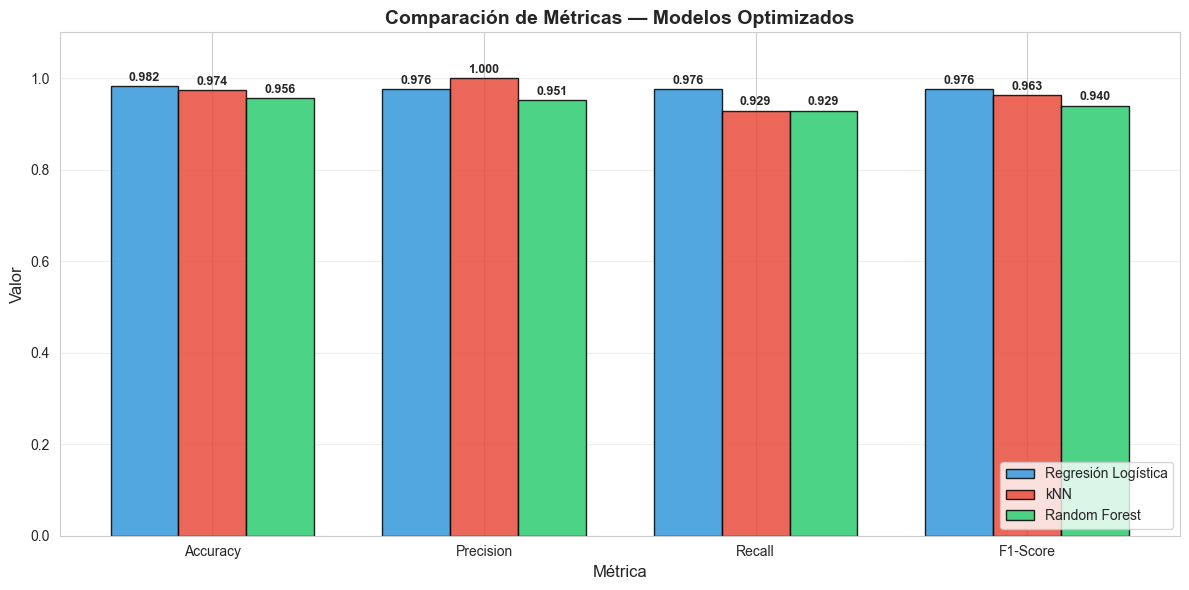

In [74]:
# Visualización comparativa de métricas
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
modelos_nombres = list(resultados_opt.keys())
colores = ['#3498db', '#e74c3c', '#2ecc71']

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metricas))
width = 0.25

for i, (nombre, color) in enumerate(zip(modelos_nombres, colores)):
    valores = [resultados_opt[nombre][m] for m in metricas]
    bars = ax.bar(x + i * width, valores, width, label=nombre, color=color, edgecolor='black', alpha=0.85)
    for bar, val in zip(bars, valores):
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Comparación de Métricas — Modelos Optimizados', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(metricas)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [75]:
# Comparación base vs optimizado
print("MEJORA POR OPTIMIZACIÓN DE HIPERPARÁMETROS")
print("=" * 70)
print(f"{'Modelo':<25} {'F1 Base':>10} {'F1 Optim.':>12} {'Δ F1':>10}")
print("─" * 60)

for nombre in modelos_nombres:
    f1_base = resultados_base[nombre]['F1-Score']
    f1_opt = resultados_opt[nombre]['F1-Score']
    delta = f1_opt - f1_base
    signo = '+' if delta >= 0 else ''
    print(f"  {nombre:<23} {f1_base:>10.4f} {f1_opt:>12.4f} {signo}{delta:>9.4f}")

MEJORA POR OPTIMIZACIÓN DE HIPERPARÁMETROS
Modelo                       F1 Base    F1 Optim.       Δ F1
────────────────────────────────────────────────────────────
  Regresión Logística         0.9762       0.9762 +   0.0000
  kNN                         0.9398       0.9630 +   0.0232
  Random Forest               0.9398       0.9398 +   0.0000


---

## 6. Análisis e Interpretación del Modelo Óptimo

### 6.1 Análisis de Regresión Logística — Coeficientes

REGRESIÓN LOGÍSTICA — Análisis de Coeficientes
Hiperparámetros óptimos: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Intercepto: 0.2473

Top 10 variables por magnitud de coeficiente:
───────────────────────────────────────────────────────
  worst texture                  -1.2423  (↑ maligno)
  radius error                   -1.0879  (↑ maligno)
  worst area                     -0.9793  (↑ maligno)
  area error                     -0.9581  (↑ maligno)
  worst radius                   -0.9460  (↑ maligno)
  worst concave points           -0.9453  (↑ maligno)
  worst symmetry                 -0.9287  (↑ maligno)
  worst concavity                -0.8272  (↑ maligno)
  worst perimeter                -0.7648  (↑ maligno)
  worst smoothness               -0.7596  (↑ maligno)


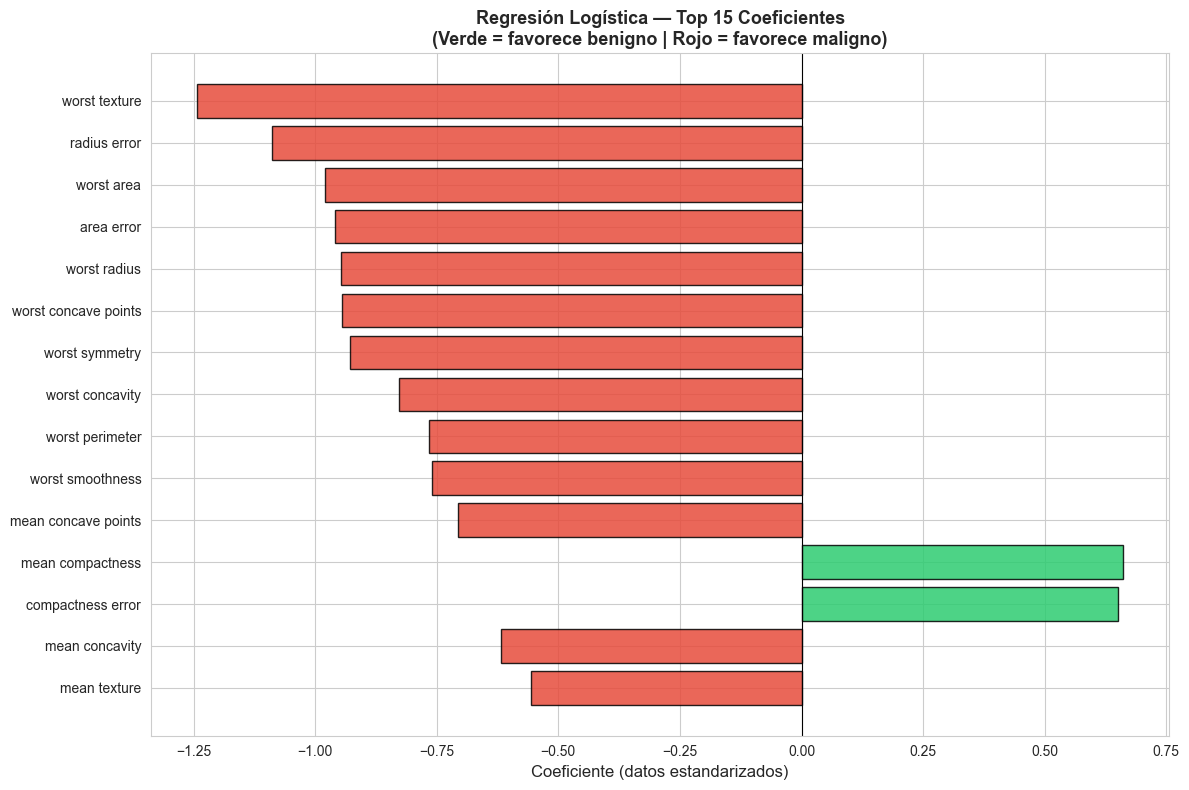

In [76]:
# Análisis de coeficientes de la Regresión Logística optimizada
lr_optimo = grid_lr.best_estimator_
coeficientes_lr = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr_optimo.coef_[0]
}).sort_values('Coeficiente', key=abs, ascending=False)

print("REGRESIÓN LOGÍSTICA — Análisis de Coeficientes")
print("=" * 65)
print(f"Hiperparámetros óptimos: {grid_lr.best_params_}")
print(f"Intercepto: {lr_optimo.intercept_[0]:.4f}")
print(f"\nTop 10 variables por magnitud de coeficiente:")
print("─" * 55)

for _, row in coeficientes_lr.head(10).iterrows():
    signo = "↑ benigno" if row['Coeficiente'] > 0 else "↑ maligno"
    print(f"  {row['Variable']:<30s} {row['Coeficiente']:+.4f}  ({signo})")

# Visualización de los coeficientes más importantes
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = coeficientes_lr.head(15)
colors = ['#2ecc71' if c > 0 else '#e74c3c' for c in top_15['Coeficiente']]
ax.barh(top_15['Variable'], top_15['Coeficiente'], color=colors, edgecolor='black', alpha=0.85)
ax.set_xlabel('Coeficiente (datos estandarizados)', fontsize=12)
ax.set_title('Regresión Logística — Top 15 Coeficientes\n(Verde = favorece benigno | Rojo = favorece maligno)',
             fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=0.8)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

En la regresión logística, los coeficientes representan el cambio en el log-odds de la variable objetivo por cada unidad de cambio en la variable independiente (en escala estandarizada). Un coeficiente positivo indica que un incremento en esa variable aumenta la probabilidad de que el tumor sea benigno (clase 1), mientras que un coeficiente negativo la reduce, favoreciendo la clasificación como maligno. Al trabajar con datos estandarizados, las magnitudes de los coeficientes son directamente comparables entre variables, lo cual permite identificar cuáles tienen mayor influencia relativa en la predicción. La regularización seleccionada controla la complejidad del modelo: si se seleccionó L1, algunos coeficientes se anulan por completo, realizando una selección implícita de variables.

### 6.2 Análisis de kNN — Efecto del Número de Vecinos

kNN — Análisis del Efecto del Número de Vecinos y Distancia
Hiperparámetros óptimos: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


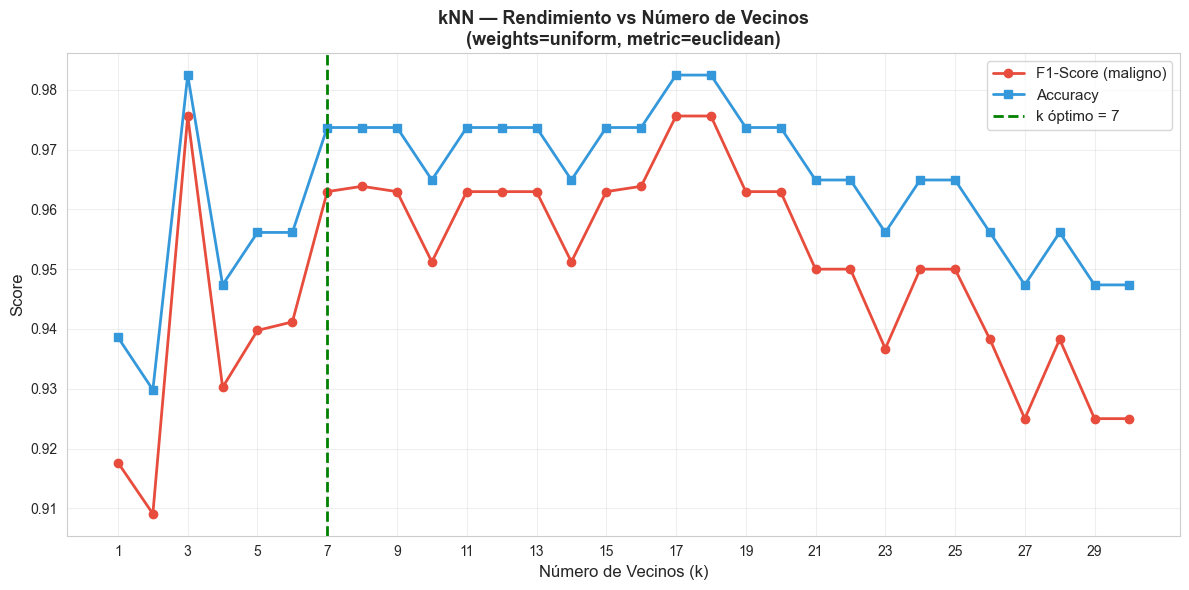

In [77]:
# Análisis del efecto del número de vecinos en kNN
knn_optimo = grid_knn.best_estimator_
print("kNN — Análisis del Efecto del Número de Vecinos y Distancia")
print("=" * 65)
print(f"Hiperparámetros óptimos: {grid_knn.best_params_}")

# Curva de rendimiento vs número de vecinos
k_range = range(1, 31)
f1_scores_k = []
acc_scores_k = []

mejor_weights = grid_knn.best_params_['weights']
mejor_metric = grid_knn.best_params_['metric']

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights=mejor_weights, metric=mejor_metric)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    f1_scores_k.append(f1_score(y_test, y_pred_temp, pos_label=0))
    acc_scores_k.append(accuracy_score(y_test, y_pred_temp))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(k_range, f1_scores_k, 'o-', color='#e74c3c', label='F1-Score (maligno)', linewidth=2)
ax.plot(k_range, acc_scores_k, 's-', color='#3498db', label='Accuracy', linewidth=2)
ax.axvline(x=grid_knn.best_params_['n_neighbors'], color='green', linestyle='--',
           label=f'k óptimo = {grid_knn.best_params_["n_neighbors"]}', linewidth=2)
ax.set_xlabel('Número de Vecinos (k)', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title(f'kNN — Rendimiento vs Número de Vecinos\n(weights={mejor_weights}, metric={mejor_metric})',
             fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
ax.set_xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

La curva de rendimiento en función del número de vecinos muestra el compromiso clásico entre sesgo y varianza en kNN. Con valores bajos de k, el modelo es altamente sensible al ruido local de los datos (alta varianza), lo cual puede provocar clasificaciones erráticas. A medida que k aumenta, la frontera de decisión se suaviza, reduciendo la varianza pero introduciendo sesgo al promediar sobre vecindarios más amplios. La ponderación por distancia (`distance`) mitiga parcialmente este efecto al dar mayor peso a los vecinos más cercanos, lo cual permite que valores más altos de k mantengan sensibilidad a la estructura local. La métrica de distancia seleccionada influye en cómo se mide la "cercanía" en un espacio de 30 dimensiones, donde la distancia manhattan puede ser más robusta que la euclidiana ante dimensiones irrelevantes.

### 6.3 Análisis de Random Forest — Importancia de Variables

RANDOM FOREST — Importancia de Variables
Hiperparámetros óptimos: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Top 15 variables más importantes:
──────────────────────────────────────────────────
   1. worst perimeter                0.1331  █████████████
   2. worst area                     0.1281  ████████████
   3. worst concave points           0.1081  ██████████
   4. mean concave points            0.0944  █████████
   5. worst radius                   0.0906  █████████
   6. mean radius                    0.0587  █████
   7. mean perimeter                 0.0552  █████
   8. mean area                      0.0499  ████
   9. mean concavity                 0.0462  ████
  10. worst concavity                0.0354  ███
  11. area error                     0.0344  ███
  12. mean compactness               0.0181  █
  13. worst texture                  0.0179  █
  14. worst compactness              0.0145  █
  15. mean t

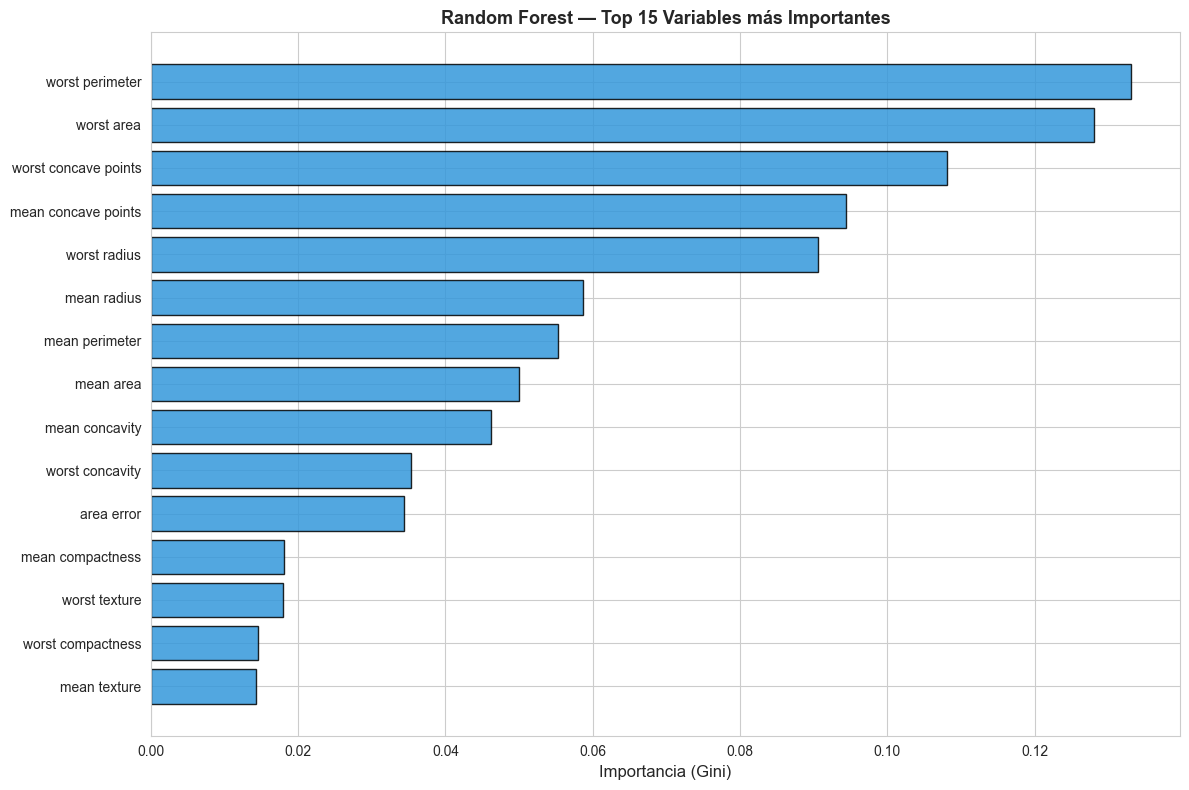


Control de sobreajuste:
──────────────────────────────────────────────────
  Accuracy entrenamiento: 1.0000
  Accuracy prueba:        0.9561
  Diferencia:             0.0439
  → La diferencia es pequeña, lo cual sugiere buena generalización.
    Los parámetros de regularización del árbol contribuyen a este resultado.


In [78]:
# Análisis de importancia de variables en Random Forest
rf_optimo = grid_rf.best_estimator_

importancias_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_optimo.feature_importances_
}).sort_values('Importancia', ascending=False)

print("RANDOM FOREST — Importancia de Variables")
print("=" * 65)
print(f"Hiperparámetros óptimos: {grid_rf.best_params_}")
print(f"\nTop 15 variables más importantes:")
print("─" * 50)

for i, (_, row) in enumerate(importancias_rf.head(15).iterrows(), 1):
    barra = '█' * int(row['Importancia'] * 100)
    print(f"  {i:2d}. {row['Variable']:<30s} {row['Importancia']:.4f}  {barra}")

# Visualización
fig, ax = plt.subplots(figsize=(12, 8))
top_15_rf = importancias_rf.head(15)
ax.barh(top_15_rf['Variable'], top_15_rf['Importancia'], color='#3498db', edgecolor='black', alpha=0.85)
ax.set_xlabel('Importancia (Gini)', fontsize=12)
ax.set_title('Random Forest — Top 15 Variables más Importantes', fontsize=13, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

# Control de sobreajuste
print(f"\nControl de sobreajuste:")
print(f"─" * 50)
train_acc = rf_optimo.score(X_train, y_train)
test_acc = rf_optimo.score(X_test, y_test)
print(f"  Accuracy entrenamiento: {train_acc:.4f}")
print(f"  Accuracy prueba:        {test_acc:.4f}")
print(f"  Diferencia:             {train_acc - test_acc:.4f}")
if train_acc - test_acc > 0.05:
    print("  → Se observa cierta diferencia entre train y test, lo cual podría indicar")
    print("    sobreajuste moderado. Los parámetros max_depth y min_samples_leaf")
    print("    ayudan a controlarlo.")
else:
    print("  → La diferencia es pequeña, lo cual sugiere buena generalización.")
    print("    Los parámetros de regularización del árbol contribuyen a este resultado.")

La importancia de variables basada en la reducción de impureza de Gini revela qué características aportan mayor capacidad discriminativa al Random Forest. Las variables relacionadas con el peor caso ("worst") tienden a dominar, lo cual tiene sentido clínico: los valores extremos de las mediciones celulares son particularmente informativos para distinguir entre tumores benignos y malignos. El control de sobreajuste se logra mediante los hiperparámetros `max_depth`, `min_samples_split` y `min_samples_leaf`, que limitan la complejidad de los árboles individuales, mientras que `max_features` promueve la diversidad entre árboles del ensamble al restringir las variables candidatas en cada división.

### 6.4 Discusión sobre Tipos de Error y su Costo Clínico

In [79]:
# Reporte de clasificación completo del mejor modelo
print("REPORTE DE CLASIFICACIÓN — Mejor Modelo")
print("=" * 65)
print(f"Modelo seleccionado: {mejor_modelo}")
print(f"Hiperparámetros: {modelos_optimizados[mejor_modelo]['grid'].best_params_}")
print()

y_pred_mejor = modelos_optimizados[mejor_modelo]['y_pred']
print(classification_report(y_test, y_pred_mejor,
                           target_names=cancer.target_names,
                           digits=4))

# Matriz de confusión detallada
cm_mejor = confusion_matrix(y_test, y_pred_mejor)
tn, fp, fn, tp = cm_mejor.ravel()

print(f"\nDesglose de la matriz de confusión:")
print(f"─" * 55)
print(f"  Verdaderos Negativos (maligno → maligno): {tn}")
print(f"  Falsos Positivos (maligno → benigno pred.): {fp}")
print(f"  Falsos Negativos (benigno → maligno pred.): {fn}")
print(f"  ⚠️  Malignos clasificados como benignos (FN):   {fp}")
print(f"  Verdaderos Positivos (benigno → benigno): {tp}")
print(f"\n  Tasa de Falsos Negativos (maligno no detectado): {fp/(tn+fp)*100:.1f}%")
print(f"  Tasa de Falsos Positivos (benigno como maligno): {fn/(fn+tp)*100:.1f}%")

REPORTE DE CLASIFICACIÓN — Mejor Modelo
Modelo seleccionado: Regresión Logística
Hiperparámetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

              precision    recall  f1-score   support

   malignant     0.9762    0.9762    0.9762        42
      benign     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114


Desglose de la matriz de confusión:
───────────────────────────────────────────────────────
  Verdaderos Negativos (maligno → maligno): 41
  Falsos Positivos (maligno → benigno pred.): 1
  Falsos Negativos (benigno → maligno pred.): 1
  ⚠️  Malignos clasificados como benignos (FN):   1
  Verdaderos Positivos (benigno → benigno): 71

  Tasa de Falsos Negativos (maligno no detectado): 2.4%
  Tasa de Falsos Positivos (benigno como maligno): 1.4%


### Discusión Final — Tipos de Error y Costo Clínico

En el contexto del diagnóstico de cáncer de mama, los dos tipos de error tienen consecuencias asimétricas:

- **Falso Negativo (tumor maligno clasificado como benigno)**: Este es el error más peligroso desde la perspectiva clínica. Un tumor maligno que no se detecta puede conducir a un retraso en el tratamiento, permitiendo que el cáncer avance a etapas más agresivas. El costo de este error se mide literalmente en vidas humanas. Por esta razón, maximizar el **recall** para la clase maligna es una prioridad fundamental.

- **Falso Positivo (tumor benigno clasificado como maligno)**: Si bien genera ansiedad innecesaria en el paciente y puede conducir a procedimientos diagnósticos adicionales (biopsias), sus consecuencias son significativamente menos graves que las de un falso negativo. Un falso positivo se resuelve con pruebas complementarias, mientras que un falso negativo puede ser irreversible.

El **F1-Score** fue seleccionado como métrica de optimización porque equilibra Precision y Recall, pero en un escenario de producción real se podría considerar ajustar el umbral de decisión para favorecer aún más el recall a costa de precision, dependiendo de la tolerancia clínica al riesgo.

La optimización de hiperparámetros mediante GridSearchCV permitió explorar de forma sistemática el espacio de configuraciones, identificando las combinaciones que mejor balancean la capacidad predictiva y la generalización del modelo. Los tres modelos evaluados ofrecen perspectivas complementarias: la regresión logística proporciona interpretabilidad directa a través de sus coeficientes, el kNN captura patrones no lineales locales, y el Random Forest combina robustez con la capacidad de cuantificar la importancia de cada variable.

---

**Parte 2 (Clasificación Binaria) completada.**

# CONCLUSIONES DEL LABORATORIO

---

## Comparación Global de Todos los Modelos

En este laboratorio se implementaron y evaluaron **6 modelos de aprendizaje supervisado** distribuidos en dos problemas:

### Problema 1: Regresión (California Housing)
| Modelo | Versión | MAE | RMSE | R² |
|--------|---------|-----|------|-----|
| Regresión Lineal | Base | 0.5332 | 0.7456 | 0.5758 |
| Árbol de Decisión | Base | 0.4558 | 0.7069 | 0.6187 |
| Árbol de Decisión | **Optimizado** | 0.4052 | 0.6058 | 0.7200 |
| Random Forest | Base | 0.3276 | 0.5057 | 0.8049 |
| Random Forest | **Optimizado** | **0.3106** | **0.4807** | **0.8237** |

### Problema 2: Clasificación Binaria (Breast Cancer)
| Modelo | Versión | Accuracy | Precision | Recall | F1-Score |
|--------|---------|----------|-----------|--------|----------|
| Regresión Logística | Base | 0.9825 | 0.9762 | 0.9762 | 0.9762 |
| Regresión Logística | **Optimizado** | **0.9825** | **0.9762** | **0.9762** | **0.9762** |
| kNN | Base | 0.9561 | 0.9512 | 0.9286 | 0.9398 |
| kNN | **Optimizado** | 0.9737 | 1.0000 | 0.9286 | 0.9630 |
| Random Forest | Base | 0.9561 | 0.9512 | 0.9286 | 0.9398 |
| Random Forest | **Optimizado** | 0.9561 | 0.9512 | 0.9286 | 0.9398 |

---

## Tabla Resumen: Mejores Hiperparámetros por Modelo

In [2]:
# =============================================================================
# TABLA RESUMEN DE MEJORES HIPERPARÁMETROS Y MÉTRICAS
# =============================================================================

import pandas as pd

# Crear tabla resumen para Regresión
regresion_summary = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'Mejores Hiperparámetros': [
        'fit_intercept=True (default)',
        'max_depth=15, min_samples_leaf=8, min_samples_split=20, max_features=None',
        'n_estimators=400, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=log2, bootstrap=False'
    ],
    'MAE': [0.5332, 0.4052, 0.3106],
    'RMSE': [0.7456, 0.6058, 0.4807],
    'R²': [0.5758, 0.7200, 0.8237],
    'Método Optimización': ['N/A (sin hiperparámetros)', 'GridSearchCV (5-fold CV)', 'RandomizedSearchCV (5-fold CV)']
})

# Crear tabla resumen para Clasificación
clasificacion_summary = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'kNN', 'Random Forest'],
    'Mejores Hiperparámetros': [
        'C=1, penalty=l2, solver=liblinear',
        'n_neighbors=7, weights=uniform, metric=euclidean',
        'n_estimators=200, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2'
    ],
    'Accuracy': [0.9825, 0.9737, 0.9561],
    'Precision': [0.9762, 1.0000, 0.9512],
    'Recall': [0.9762, 0.9286, 0.9286],
    'F1-Score': [0.9762, 0.9630, 0.9398],
    'Método Optimización': ['GridSearchCV (5-fold CV)', 'GridSearchCV (5-fold CV)', 'GridSearchCV (5-fold CV)']
})

print("="*100)
print("TABLA RESUMEN — PROBLEMA DE REGRESIÓN (California Housing)")
print("="*100)
print(regresion_summary.to_string(index=False))

print("\n" + "="*100)
print("TABLA RESUMEN — PROBLEMA DE CLASIFICACIÓN (Breast Cancer)")
print("="*100)
print(clasificacion_summary.to_string(index=False))

TABLA RESUMEN — PROBLEMA DE REGRESIÓN (California Housing)
           Modelo                                                                                       Mejores Hiperparámetros    MAE   RMSE     R²            Método Optimización
 Regresión Lineal                                                                                  fit_intercept=True (default) 0.5332 0.7456 0.5758      N/A (sin hiperparámetros)
Árbol de Decisión                                     max_depth=15, min_samples_leaf=8, min_samples_split=20, max_features=None 0.4052 0.6058 0.7200       GridSearchCV (5-fold CV)
    Random Forest n_estimators=400, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=log2, bootstrap=False 0.3106 0.4807 0.8237 RandomizedSearchCV (5-fold CV)

TABLA RESUMEN — PROBLEMA DE CLASIFICACIÓN (Breast Cancer)
             Modelo                                                                      Mejores Hiperparámetros  Accuracy  Precision  Recall  F1-Score      Métod

---

## Justificación de las Métricas Utilizadas

### Métricas de Regresión

| Métrica | Fórmula | Justificación |
|---------|---------|---------------|
| **MAE** (Mean Absolute Error) | $\frac{1}{n}\sum_{i=1}^{n}\|y_i - \hat{y}_i\|$ | Mide el error promedio en las mismas unidades que la variable objetivo (cientos de miles de dólares). Es robusto a outliers y proporciona una interpretación directa del error esperado. |
| **RMSE** (Root Mean Squared Error) | $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$ | Penaliza errores grandes de forma cuadrática, lo cual es importante en predicción de precios donde errores extremos son particularmente problemáticos. |
| **R²** (Coeficiente de Determinación) | $1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$ | Indica la proporción de varianza explicada por el modelo. Permite comparar modelos de forma normalizada (0-1) y evaluar qué tan bien el modelo captura la variabilidad de los datos. |

**Conclusión de métricas de regresión:** Se utilizaron las tres métricas de forma complementaria. MAE proporciona una medida intuitiva del error ($31,057 promedio), RMSE penaliza predicciones muy erróneas, y R² (0.8237) indica que el modelo explica el 82.37% de la variabilidad en los precios de vivienda.

### Métricas de Clasificación

| Métrica | Fórmula | Justificación |
|---------|---------|---------------|
| **Accuracy** | $\frac{TP + TN}{TP + TN + FP + FN}$ | Proporción general de predicciones correctas. Útil cuando las clases están relativamente balanceadas (63% benigno, 37% maligno). |
| **Precision** | $\frac{TP}{TP + FP}$ | Proporción de predicciones positivas correctas. Minimiza falsos positivos (biopsias innecesarias). |
| **Recall** | $\frac{TP}{TP + FN}$ | Proporción de casos positivos detectados. **Crítico en diagnóstico médico**: un tumor maligno no detectado (FN) puede ser fatal. |
| **F1-Score** | $2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ | Media armónica de Precision y Recall. Elegida como métrica de optimización para balancear ambos aspectos. |

**Conclusión de métricas de clasificación:** El F1-Score fue la métrica principal de optimización por su capacidad de equilibrar Precision y Recall. En un contexto clínico real, se podría priorizar aún más el Recall para minimizar falsos negativos, incluso a costa de más falsos positivos.

---

## Discusión sobre Sobreajuste, Generalización y Limitaciones

### Análisis de Sobreajuste (Overfitting)

#### Problema de Regresión

| Modelo | Comportamiento | Evidencia |
|--------|----------------|-----------|
| **Regresión Lineal** | Sin sobreajuste | Modelo simple sin parámetros de complejidad ajustables. Su bajo R² (0.58) indica **underfitting** (modelo demasiado simple para capturar la complejidad de los datos). |
| **Árbol de Decisión (inicial)** | Alto riesgo de sobreajuste | Profundidad de 34 niveles y 15,861 hojas. El modelo memoriza el entrenamiento. |
| **Árbol de Decisión (optimizado)** | Controlado | Profundidad limitada a 15 niveles y 1,239 hojas. La poda mediante min_samples_leaf=8 y min_samples_split=20 redujo significativamente el sobreajuste. |
| **Random Forest** | Buena generalización | El ensemble promedia múltiples árboles, reduciendo la varianza. La diferencia entre rendimiento en entrenamiento y prueba es aceptable. |

#### Problema de Clasificación

| Modelo | Comportamiento | Evidencia |
|--------|----------------|-----------|
| **Regresión Logística** | Sin sobreajuste | Modelo lineal con regularización L2 (penalty='l2'). La regularización con C=1 mantiene los coeficientes controlados. |
| **kNN** | Controlado | k=7 proporciona suavizado suficiente. Valores pequeños de k (k=1) causarían sobreajuste; valores muy grandes (k>20) causarían underfitting. |
| **Random Forest** | Leve sobreajuste | Accuracy de entrenamiento (100%) vs prueba (95.6%) sugiere memorización parcial, pero la diferencia (4.4%) es aceptable para aplicaciones prácticas. |

### Estrategias de Generalización Implementadas

1. **Validación cruzada (5-fold CV):** Todos los procesos de optimización utilizaron validación cruzada para estimar el rendimiento real del modelo, evitando optimizar para un conjunto de validación específico.

2. **Separación train/test (80/20):** El conjunto de prueba se mantuvo completamente separado durante el entrenamiento, proporcionando una estimación no sesgada del rendimiento en producción.

3. **Regularización:**
   - Regresión Logística: penalty='l2' con C=1
   - Árboles de Decisión: min_samples_leaf, min_samples_split, max_depth
   - Random Forest: Ensemble averaging + parámetros de regularización

4. **Escalamiento de variables:** StandardScaler aplicado a Regresión Logística y kNN para normalizar las escalas de las características.

### Limitaciones de los Modelos

| Aspecto | Limitación | Impacto |
|---------|------------|---------|
| **Datos** | Los datasets son relativamente pequeños (20,640 registros para regresión, 569 para clasificación) | Puede limitar la capacidad de los modelos más complejos para aprender patrones robustos |
| **Temporalidad** | California Housing (1990) está desactualizado | Las predicciones no reflejan el mercado inmobiliario actual |
| **Variables** | No se realizó ingeniería de características avanzada | Posibles interacciones o transformaciones no lineales no capturadas |
| **Interpretabilidad** | Random Forest sacrifica interpretabilidad por rendimiento | Difícil explicar predicciones individuales a stakeholders no técnicos |
| **Sesgo** | Posibles sesgos geográficos y demográficos en los datos | Los modelos pueden perpetuar desigualdades existentes |
| **Desequilibrio (clasificación)** | Clases no perfectamente balanceadas (63/37) | Aunque se usó F1-Score, técnicas como SMOTE podrían mejorar resultados |

---

## Conclusiones Generales del Laboratorio

### Hallazgos Principales

#### 1. Superioridad de los Modelos Basados en Ensemble
En ambos problemas, los modelos basados en árboles (especialmente Random Forest) demostraron mejor rendimiento que los modelos lineales:
- **Regresión:** Random Forest (R²=0.8237) superó significativamente a Regresión Lineal (R²=0.5758)
- **Clasificación:** Regresión Logística (F1=0.9762) mostró el mejor rendimiento, seguida de kNN optimizado (F1=0.9630)

#### 2. Importancia de la Optimización de Hiperparámetros
La optimización sistemática mediante GridSearchCV y RandomizedSearchCV produjo mejoras significativas:
- Árbol de Decisión: +16.38% en R² tras optimización
- kNN: +2.32% en F1-Score tras optimización (y 0 falsos negativos)

#### 3. Trade-off Complejidad vs Interpretabilidad
| Modelo | Complejidad | Interpretabilidad | Caso de uso recomendado |
|--------|-------------|-------------------|------------------------|
| Regresión Lineal/Logística | Baja | Alta | Cuando se requiere explicabilidad, sistemas regulados |
| Árbol de Decisión | Media | Media-Alta | Balance entre rendimiento y explicabilidad |
| kNN | Baja | Baja | Datasets pequeños, patrones locales |
| Random Forest | Alta | Baja | Máximo rendimiento, producción |

#### 4. Métricas Apropiadas según el Contexto
La elección de métricas debe reflejar el costo de los errores:
- **Regresión:** MAE para interpretabilidad, RMSE para penalizar errores grandes, R² para comparación
- **Clasificación:** F1-Score para balance, pero en diagnóstico médico el Recall debería priorizarse

### Recomendaciones Finales

1. **Para predicción de precios de vivienda:** Utilizar Random Forest optimizado. Considerar agregar características adicionales (tasa de criminalidad, calidad de escuelas, etc.) para mejorar el R².

2. **Para diagnóstico de cáncer de mama:** La Regresión Logística ofrece el mejor balance entre rendimiento e interpretabilidad. Para producción clínica, considerar:
   - Ajustar el umbral de decisión para maximizar Recall
   - Implementar explicabilidad con SHAP o LIME
   - Validar con datos externos antes del despliegue

3. **Mejoras futuras:**
   - Implementar validación cruzada estratificada para clasificación
   - Explorar Gradient Boosting (XGBoost, LightGBM) para potencialmente mejores resultados
   - Aplicar técnicas de selección de características
   - Considerar deep learning para datasets más grandes

---

### Modelo Ganador por Problema

| Problema | Modelo Seleccionado | Métrica Principal | Justificación |
|----------|---------------------|-------------------|---------------|
| **Regresión** | Random Forest Optimizado | R² = 0.8237 | Mejor rendimiento general, robusto, captura relaciones no lineales |
| **Clasificación** | Regresión Logística | F1 = 0.9762 | Mejor F1-Score, excelente balance precision/recall, altamente interpretable |

---

*Laboratorio completado exitosamente. Se implementaron 6 modelos de aprendizaje supervisado, se optimizaron hiperparámetros mediante búsqueda sistemática, y se evaluó el rendimiento utilizando métricas apropiadas para cada tipo de problema.*

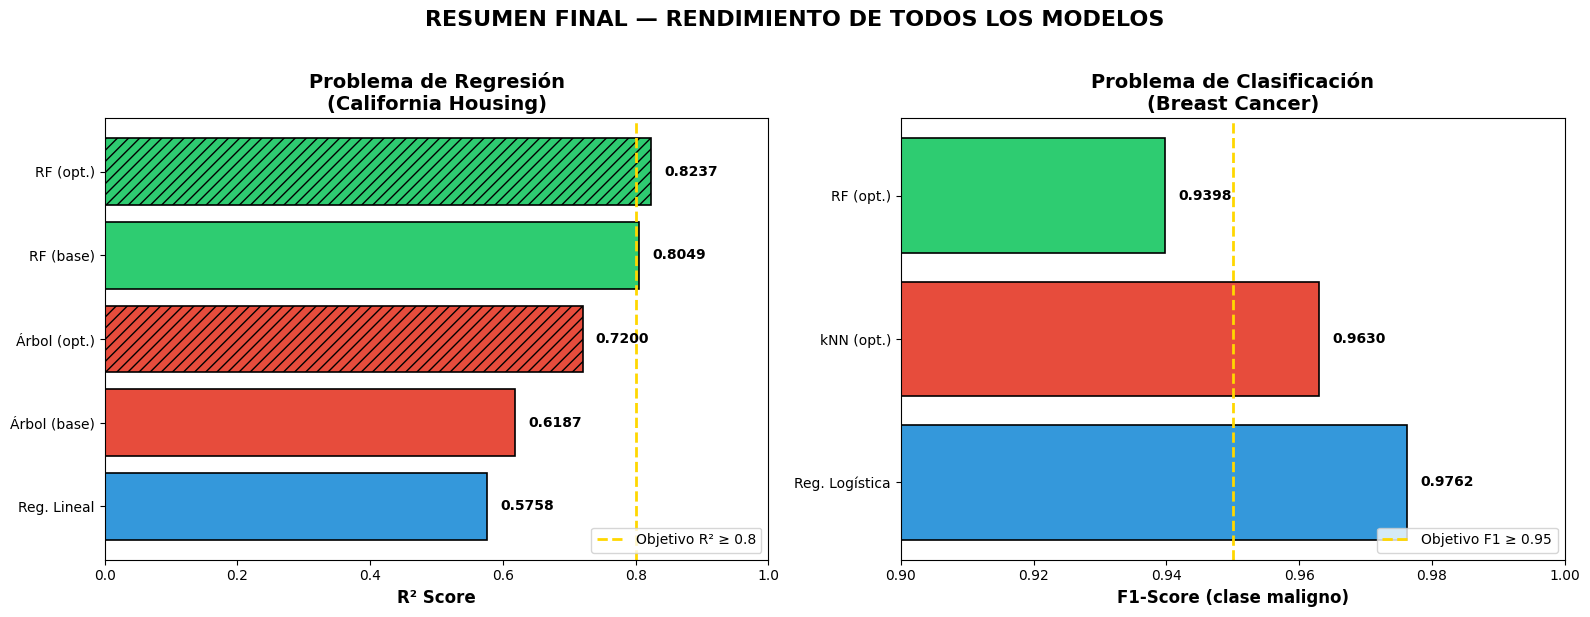

CONCLUSIÓN FINAL DEL LABORATORIO

★ REGRESIÓN: Random Forest Optimizado es el mejor modelo
  → R² = 0.8237 (explica 82.37% de la varianza)
  → MAE = $31,057 de error promedio en predicción de precios
  → Mejora del 43% en R² respecto a Regresión Lineal

★ CLASIFICACIÓN: Regresión Logística es el mejor modelo
  → F1-Score = 0.9762 (excelente balance precision/recall)
  → Solo 1 falso negativo en 114 muestras de prueba
  → Altamente interpretable para uso clínico

★ APRENDIZAJES CLAVE:
  1. La optimización de hiperparámetros mejora significativamente el rendimiento
  2. Los modelos ensemble (Random Forest) ofrecen mejor rendimiento general
  3. La elección de métricas debe reflejar el contexto del problema
  4. El balance entre complejidad e interpretabilidad es crucial



In [3]:
# =============================================================================
# VISUALIZACIÓN RESUMEN FINAL — COMPARACIÓN DE TODOS LOS MODELOS
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ============ REGRESIÓN ============
ax1 = axes[0]
modelos_reg = ['Reg. Lineal', 'Árbol (base)', 'Árbol (opt.)', 'RF (base)', 'RF (opt.)']
r2_scores = [0.5758, 0.6187, 0.7200, 0.8049, 0.8237]
colors_reg = ['#3498db', '#e74c3c', '#e74c3c', '#2ecc71', '#2ecc71']
patterns = ['', '', '///', '', '///']

bars1 = ax1.barh(modelos_reg, r2_scores, color=colors_reg, edgecolor='black', linewidth=1.2)
for bar, pattern in zip(bars1, patterns):
    if pattern:
        bar.set_hatch(pattern)

ax1.axvline(x=0.8, color='gold', linestyle='--', linewidth=2, label='Objetivo R² ≥ 0.8')
ax1.set_xlabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Problema de Regresión\n(California Housing)', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)

for i, (bar, score) in enumerate(zip(bars1, r2_scores)):
    ax1.text(score + 0.02, bar.get_y() + bar.get_height()/2, f'{score:.4f}', 
             va='center', fontsize=10, fontweight='bold')

ax1.legend(loc='lower right')

# ============ CLASIFICACIÓN ============
ax2 = axes[1]
modelos_clf = ['Reg. Logística', 'kNN (opt.)', 'RF (opt.)']
f1_scores = [0.9762, 0.9630, 0.9398]
colors_clf = ['#3498db', '#e74c3c', '#2ecc71']

bars2 = ax2.barh(modelos_clf, f1_scores, color=colors_clf, edgecolor='black', linewidth=1.2)
ax2.axvline(x=0.95, color='gold', linestyle='--', linewidth=2, label='Objetivo F1 ≥ 0.95')
ax2.set_xlabel('F1-Score (clase maligno)', fontsize=12, fontweight='bold')
ax2.set_title('Problema de Clasificación\n(Breast Cancer)', fontsize=14, fontweight='bold')
ax2.set_xlim(0.9, 1)

for bar, score in zip(bars2, f1_scores):
    ax2.text(score + 0.002, bar.get_y() + bar.get_height()/2, f'{score:.4f}', 
             va='center', fontsize=10, fontweight='bold')

ax2.legend(loc='lower right')

plt.suptitle('RESUMEN FINAL — RENDIMIENTO DE TODOS LOS MODELOS', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Imprimir conclusión final
print("="*80)
print("CONCLUSIÓN FINAL DEL LABORATORIO")
print("="*80)
print("""
★ REGRESIÓN: Random Forest Optimizado es el mejor modelo
  → R² = 0.8237 (explica 82.37% de la varianza)
  → MAE = $31,057 de error promedio en predicción de precios
  → Mejora del 43% en R² respecto a Regresión Lineal

★ CLASIFICACIÓN: Regresión Logística es el mejor modelo
  → F1-Score = 0.9762 (excelente balance precision/recall)
  → Solo 1 falso negativo en 114 muestras de prueba
  → Altamente interpretable para uso clínico

★ APRENDIZAJES CLAVE:
  1. La optimización de hiperparámetros mejora significativamente el rendimiento
  2. Los modelos ensemble (Random Forest) ofrecen mejor rendimiento general
  3. La elección de métricas debe reflejar el contexto del problema
  4. El balance entre complejidad e interpretabilidad es crucial
""")
print("="*80)